In [2]:
from tensorflow.keras.models import Sequential  # 순차적으로 층을 쌓는 신경망 모델 생성에 필요한 클래스입니다.
from tensorflow.keras.layers import Dense       # 완전 연결(Dense) 층을 추가할 때 사용하는 클래스입니다.
import numpy as np                              # 수치 계산과 배열 연산을 위해 NumPy 라이브러리를 불러옵니다.

In [3]:
!git clone https://github.com/kyuchangChang/202508_LG.git
!ls

Cloning into '202508_LG'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 20.66 MiB | 39.76 MiB/s, done.
Resolving deltas: 100% (2/2), done.
202508_LG  sample_data


In [4]:
%cd 202508_LG

/content/202508_LG


In [5]:
import zipfile
import os

zip_path = "data.zip"   # 현재 폴더에 있으니 경로 없이 가능
extract_dir = "data"    # 압축 해제할 폴더 이름

# 압축 풀기
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# 압축 풀린 파일 목록 확인
os.listdir(extract_dir)

['test',
 'ThoraricSurgery3.csv',
 'sonar3.csv',
 'img',
 'wine.csv',
 'house_train.csv',
 'pima-indians-diabetes3.csv',
 'sentiment_data.csv',
 'train',
 'titanic_train.csv',
 'model',
 'kaggle',
 'gan_images',
 'diabetes.csv',
 'iris3.csv',
 'house_test.csv']

In [6]:
#from google.colab import files
#uploaded = files.upload()

In [7]:
Data_set = np.loadtxt("data/ThoraricSurgery3.csv", delimiter=",")  # CSV 파일에서 데이터를 불러와 배열 형태로 저장합니다.
X = Data_set[:, 0:16]                                         # 입력 변수(앞 16개의 열)를 X에 할당합니다.
y = Data_set[:, 16]

In [8]:
model = Sequential()                                # 순차적으로 층을 쌓는 신경망 모델을 생성합니다.
model.add(Dense(30, input_dim=16, activation='relu'))  # 입력층(16개 특성)과 연결된 은닉층: 뉴런 30개, ReLU 활성화 함수 사용
model.add(Dense(1, activation='sigmoid'))             # 출력층: 뉴런 1개, sigmoid 활성화 함수로 이진 분류 수행

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 학습에 사용할 손실 함수, 최적화 알고리즘, 평가 지표를 설정합니다.

history = model.fit(X, y, epochs=5, batch_size=16)
# 데이터를 이용해 모델을 학습시킵니다. (5번 반복 학습, 배치 크기 16)


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8838 - loss: 4.1490
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8295 - loss: 4.5388
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8615 - loss: 2.3051
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8503 - loss: 1.0558
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8449 - loss: 0.4385


In [10]:
# 입력 데이터와 목표 데이터를 각각 x, y라는 NumPy 배열로 정의합니다.
x = np.array([2, 4, 6, 8])    # 예시 입력값
y = np.array([81, 93, 91, 97])  # 예시 출력값(목표값)


In [11]:
#x의 평균값을 구합니다.
mx = np.mean(x)

#y의 평균값을 구합니다.
my = np.mean(y)

# 출력으로 확인합니다.
print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 5.0
y의 평균값: 90.5


In [12]:
# 입력 데이터 x의 평균을 계산합니다.
mx = np.mean(x)

# 목표 데이터 y의 평균을 계산합니다.
my = np.mean(y)

# 계산된 평균값을 출력합니다.
print("x의 평균값:", mx)
print("y의 평균값:", my)


x의 평균값: 5.0
y의 평균값: 90.5


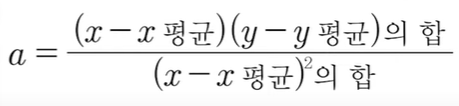

In [13]:
# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx)**2 for i in x])

# 기울기 공식의 분자 부분입니다.
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

# 출력으로 확인합니다.
print("분모:", divisor)
print("분자:", dividend)

분모: 20.0
분자: 46.0


In [14]:
# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y절편 b 를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print("기울기 a =", a)
print("y절편 b =", b)

기울기 a = 2.3
y절편 b = 79.0


평균 제곱 오차

In [15]:
# 예시용으로 임의의 기울기(a)와 절편(b)을 설정합니다.
fake_a = 3
fake_b = 76

# 입력 데이터와 목표 데이터를 NumPy 배열로 정의합니다.
x = np.array([2, 4, 6, 8])      # 예시 입력값
y = np.array([81, 93, 91, 97])  # 예시 출력값


In [16]:

# y = ax + b 형태의 직선 방정식에 임의로 설정한 a, b 값을 적용하여 예측값을 계산하는 함수입니다.
def predict(x):
    return fake_a * x + fake_b

# 예측 결과를 저장할 빈 리스트를 생성합니다.
predict_result = []

# 모든 입력값 x에 대해 예측값을 계산하고 리스트에 추가합니다.
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("입력값=%.f, 실제값=%.f, 예측값=%.f" % (x[i], y[i], predict(x[i])))


입력값=2, 실제값=81, 예측값=82
입력값=4, 실제값=93, 예측값=88
입력값=6, 실제값=91, 예측값=94
입력값=8, 실제값=97, 예측값=100


선형 회귀 모델

In [17]:
#matplotlib 라이브러리를 설치합니다.
!pip install matplotlib

In [18]:
import numpy as np                     # 수치 계산과 배열 연산을 위한 NumPy
import matplotlib.pyplot as plt        # 간단한 시각화를 위한 Matplotlib

# 입력 데이터(x)와 목표 데이터(y)를 NumPy 배열로 정의합니다.
x = np.array([2, 4, 6, 8])      # 예시 입력값
y = np.array([81, 93, 91, 97])


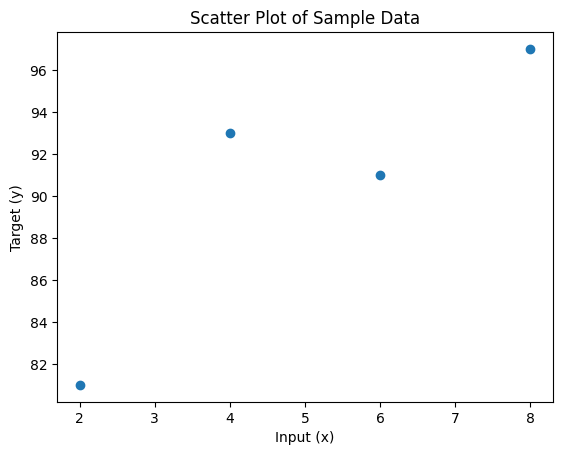

In [19]:
# 입력 데이터(x)와 목표 데이터(y)의 관계를 산점도로 시각화합니다.
plt.scatter(x, y)
plt.xlabel("Input (x)")
plt.ylabel("Target (y)")
plt.title("Scatter Plot of Sample Data")
plt.show()


In [20]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a = 0
b = 0

#학습률을 정합니다.
lr = 0.03

#몇 번 반복될지를 설정합니다.
epochs = 2001

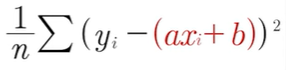

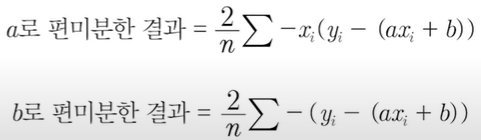

In [21]:
# x 값이 총 몇 개인지 셉니다.
n=len(x)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복

    y_pred = a * x + b                   # 예측 값을 구하는 식입니다.
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.

    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.

    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


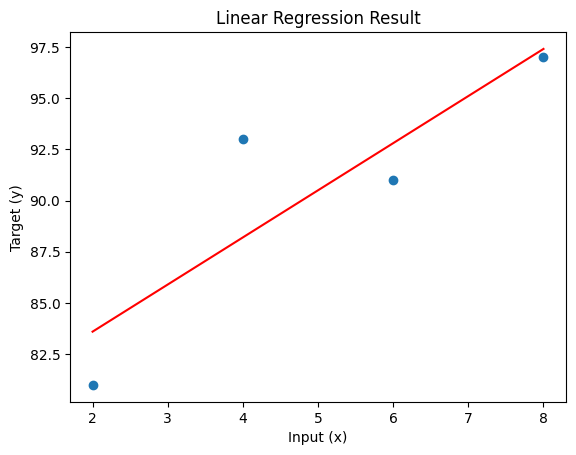

In [22]:
# 학습된 기울기(a)와 절편(b)을 사용하여 예측값을 계산합니다.
y_pred = a * x + b

# 실제 데이터와 예측 직선을 함께 시각화합니다.
plt.scatter(x, y)          # 실제 데이터 산점도
plt.plot(x, y_pred, 'r')   # 예측 직선(빨간색)
plt.xlabel("Input (x)")
plt.ylabel("Target (y)")
plt.title("Linear Regression Result")
plt.show()



In [23]:
# 새로운 데이터 준비
# 두 개의 입력 변수(x1, x2)와 목표 변수(y)를 NumPy 배열로 정의합니다.
x1 = np.array([2, 4, 6, 8])   # 입력 변수 1 (예: 특성 A)
x2 = np.array([0, 4, 2, 3])   # 입력 변수 2 (예: 특성 B)
y  = np.array([81, 93, 91, 97])  # 목표 변수 (예: 출력값)


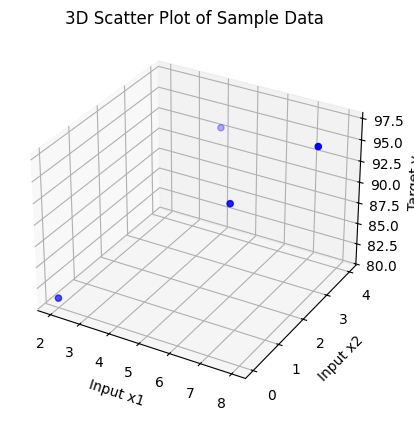

In [24]:
# 두 개의 입력 변수(x1, x2)와 목표 변수(y)의 관계를 3차원 산점도로 시각화합니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y, c='blue', marker='o')  # 파란색 원으로 데이터 표시

# 축 라벨을 추가하여 의미를 명확히 합니다.
ax.set_xlabel("Input x1")
ax.set_ylabel("Input x2")
ax.set_zlabel("Target y")
ax.set_title("3D Scatter Plot of Sample Data")

plt.show()


In [25]:
# 기울기(a1, a2)와 절편(b)의 초기값을 설정합니다.
a1 = 0   # 입력 변수 x1에 대한 가중치(기울기)
a2 = 0   # 입력 변수 x2에 대한 가중치(기울기)
b  = 0   # 절편(편향, bias)

# 학습률(learning rate)을 지정합니다.
lr = 0.01

# 학습 반복 횟수(epochs)를 설정합니다.
epochs = 2001


경사하강법

In [26]:
# 데이터 개수를 구합니다. (x1, x2의 길이는 동일하므로 x1 기준으로 계산)
n = len(x1)

# 경사하강법(Gradient Descent)을 수행합니다.
for i in range(epochs):  # 설정한 epoch 횟수만큼 반복 수행

    # 현재 기울기(a1, a2)와 절편(b)을 사용하여 예측값 계산
    y_pred = a1 * x1 + a2 * x2 + b

    # 실제값(y)과의 차이를 오차(error)로 정의
    error = y - y_pred

    # 각 변수에 대한 기울기(편미분 결과) 계산
    a1_diff = (2/n) * sum(-x1 * error)  # a1에 대한 편미분
    a2_diff = (2/n) * sum(-x2 * error)  # a2에 대한 편미분
    b_diff  = (2/n) * sum(-error)       # b에 대한 편미분

    # 경사하강법 업데이트 규칙에 따라 a1, a2, b 값을 갱신
    a1 = a1 - lr * a1_diff
    a2 = a2 - lr * a2_diff
    b  = b - lr * b_diff

    # 학습 과정 중 100번째 epoch마다 현재 파라미터 값을 출력
    if i % 100 == 0:
        print("epoch=%d, 기울기1=%.4f, 기울기2=%.4f, 절편=%.4f" % (i, a1, a2, b))


epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [27]:
#실제 점수와 예측 된 점수를 출력합니다.
print("실제 점수:", y)
print("예측 점수:", y_pred)

실제 점수: [81 93 91 97]
예측 점수: [80.76387645 92.97153922 91.42520875 96.7558749 ]


선형 회귀 모델_KERAS

In [28]:
import numpy as np                     # 수치 계산과 배열 연산을 위한 NumPy
import matplotlib.pyplot as plt        # 데이터 시각화를 위한 Matplotlib

# Keras(딥러닝 고수준 API)에서 순차 모델과 완전연결(Dense) 층을 불러옵니다.
from tensorflow.keras.models import Sequential   # 층을 순서대로 쌓는 신경망 모델 클래스
from tensorflow.keras.layers import Dense        # 완전연결(FC) 층을 구성하는 클래스


In [29]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [30]:
model = Sequential()  # 순차 모델 생성

# 입력 1개 → 출력 1개인 선형 회귀 모델
model.add(Dense(1, input_dim=1, activation='linear'))

# 최적화: SGD, 손실: MSE
model.compile(optimizer='sgd', loss='mse')

# 학습: 500 epoch (verbose=0: 출력 생략)
model.fit(x, y, epochs=500, verbose=0)

# (선택) 재현성 확보용 시드 — 필요 시 아래 주석 해제
# np.random.seed(42)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


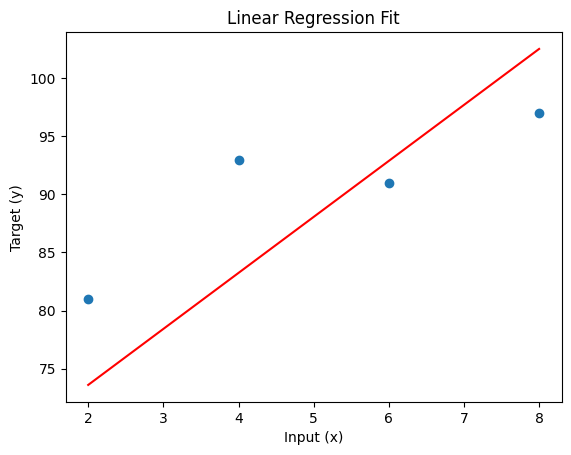

In [31]:
plt.scatter(x, y)                         # 실제 데이터 산점도
plt.plot(x, model.predict(x), 'r')        # 학습된 모델의 예측 직선(빨간색) 표시
plt.xlabel("Input (x)")
plt.ylabel("Target (y)")
plt.title("Linear Regression Fit")
plt.show()

모델 테스트

In [32]:
import tensorflow as tf

# 새로운 입력값(hour)을 넣어 모델이 예측하는 결과를 확인합니다.
hour = 7

# 입력 데이터를 텐서 형태(float32)로 변환합니다. (데이터 타입을 지정하여 오류 방지)
input_data = tf.constant([[hour]], dtype=tf.float32)

# 학습된 모델을 사용해 점수를 예측합니다.
prediction = model.predict(input_data)[0][0]

# 예측 결과를 출력합니다.
print("%.f시간을 입력했을 때, 예상 점수는 %.2f점입니다." % (hour, prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
7시간을 입력했을 때, 예상 점수는 97.70점입니다.


다중선형회귀모델

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Keras API에서 신경망 모델과 Dense 층을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 두 개의 입력 변수(x1, x2)와 목표값(y)을 NumPy 배열로 정의합니다.
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])  # 입력 데이터 (x1, x2)
y = np.array([81, 93, 91, 97])                  # 목표 데이터


In [34]:
model = Sequential()

# 입력 변수가 2개이므로 input_dim=2로 지정하고, 출력은 1개로 설정합니다.
# 활성화 함수는 'linear'를 사용하여 연속적인 값을 예측합니다.
model.add(Dense(1, input_dim=2, activation='linear'))

# 최적화 알고리즘: SGD(경사하강법), 손실 함수: MSE(평균제곱오차)
model.compile(optimizer='sgd', loss='mse')

# 모델 학습 (500 epoch 반복, verbose=0: 학습 과정 출력 생략)
model.fit(x, y, epochs=500, verbose=0)


모델 테스트

In [35]:
import tensorflow as tf

# 새로운 입력값(학습 시간, 과외 시간)을 정의합니다.
hour = 6
private_class = 3

# 입력값을 2차원 텐서로 변환합니다. (형식: [[x1, x2]])
input_data = tf.constant([[hour, private_class]])

# 학습된 모델을 사용하여 예측값을 계산합니다.
prediction = model.predict(input_data)[0][0]

# 예측 결과 출력
print("%.f시간 공부 + %.f시간 과외 → 예상 점수: %.2f점" % (hour, private_class, prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
6시간 공부 + 3시간 과외 → 예상 점수: 94.10점


로지스틱 회귀 모델: 참 거짓 판단하기

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

In [38]:
model = Sequential()

# 입력 1개 → 출력 1개인 이진 분류 모델
# 출력층 활성화 함수로 'sigmoid'를 사용하여 결과를 [0, 1] 범위 확률로 변환합니다.
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# 손실 함수: binary_crossentropy (이진 분류에서 사용되는 교차 엔트로피 오차 함수)
# 최적화 알고리즘: SGD
model.compile(optimizer='sgd', loss='binary_crossentropy')

# 모델 학습 (100 epoch 반복)
model.fit(x, y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - loss: 2.9426
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.9117
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.8809
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.8501
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 2.8193
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 2.7885
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.7577
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.7269
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.6962
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 2.6655
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.6348
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.6041
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.5735
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 2.5429
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 2.5122
Epoch 16/100
1/1 ━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


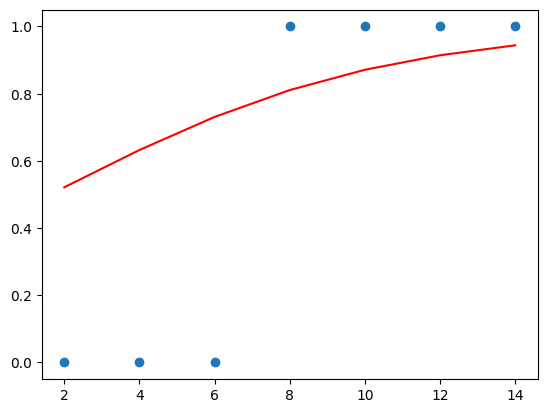

In [39]:
# 실제 데이터와 모델의 예측 결과를 비교하여 시각화합니다.
plt.scatter(x, y)                     # 실제 데이터 산점도
plt.plot(x, model.predict(x), 'r')    # 모델이 예측한 곡선(빨간색)
plt.show()


In [40]:
import tensorflow as tf
print("현재 TensorFlow 버전:", tf.__version__)

# 새로운 입력값(hour)을 정의합니다.
hour = 7

# 입력값을 텐서(float32)로 변환하여 모델에 전달합니다.
input_data = tf.constant([[hour]], dtype=tf.float32)

# 학습된 모델로 합격 확률을 예측합니다.
prediction = model.predict(input_data)[0][0]

# 예측된 확률을 백분율(%)로 변환하여 출력합니다.
print("%.f시간 공부 시, 합격 예상 확률은 %.1f%%입니다." % (hour, prediction * 100))


현재 TensorFlow 버전: 2.19.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
7시간 공부 시, 합격 예상 확률은 77.3%입니다.


퍼셉트론

In [41]:
import numpy as np

# 가중치(웨이트)와 바이어스 설정
w11 = np.array([-2, -2])   # NAND용 1층 가중치
w12 = np.array([ 2,  2])   # OR용 1층 가중치
w2  = np.array([ 1,  1])   # AND용 2층 가중치
b1 = 3                     # NAND 바이어스
b2 = -1                    # OR 바이어스
b3 = -1                    # AND 바이어스

# 단일 퍼셉트론(스텝 함수) 구현: 입력 x, 가중치 w, 바이어스 b → {0,1}
def MLP(x, w, b):
    y = np.sum(w * x) + b   # (선택) np.dot(w, x)로 바꿔도 동일 동작
    return 0 if y <= 0 else 1

# 기본 논리 게이트
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)

def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)

def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

# XOR = (x1 NAND x2) AND (x1 OR x2)  — 퍼셉트론 2층 조합으로 구현
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

# 테스트: 입력 조합별 XOR 결과 출력
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(x[0], x[1])
    print("입력 값:", x, "→ 출력 값:", y)


입력 값: (0, 0) → 출력 값: 0
입력 값: (1, 0) → 출력 값: 1
입력 값: (0, 1) → 출력 값: 1
입력 값: (1, 1) → 출력 값: 0


In [42]:
# Keras API에서 모델 구성에 필요한 클래스 불러오기
from tensorflow.keras.models import Sequential   # 순차적 신경망 모델
from tensorflow.keras.layers import Dense        # 완전 연결(Dense) 층

# 수치 계산과 배열 연산을 위한 NumPy
import numpy as np


In [43]:
#from google.colab import files
#uploaded = files.upload()

In [44]:
Data_set = np.loadtxt("data/ThoraricSurgery3.csv", delimiter=",")  # CSV 파일에서 데이터를 불러와 배열 형태로 저장합니다.

# 입력 변수(앞 16개 열)와 목표 변수(마지막 열)를 분리합니다.
X = Data_set[:, 0:16]   # 입력 데이터
y = Data_set[:, 16]     # 출력 데이터 (이진 분류: 0 또는 1)

In [45]:
# 순차적으로 층을 쌓는 신경망 모델을 생성합니다.
model = Sequential()

# 은닉층: 입력 차원은 16개, 뉴런 수는 30개, 활성화 함수는 ReLU
model.add(Dense(30, input_dim=16, activation='relu'))

# 출력층: 뉴런 1개, 활성화 함수는 sigmoid (이진 분류 확률 출력)
model.add(Dense(1, activation='sigmoid'))


In [46]:
# 모델 학습 방법을 설정합니다.
# - 손실 함수: binary_crossentropy (이진 분류 문제용)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도(accuracy)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습을 수행합니다.
# - epochs=5 : 전체 데이터를 5번 반복 학습
# - batch_size=16 : 한 번에 16개 샘플씩 학습
history = model.fit(X, y, epochs=5, batch_size=16)


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1641 - loss: 7.8276
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4535 - loss: 1.0315
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8602 - loss: 0.4516
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8365 - loss: 0.4738
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8633 - loss: 0.4122


데이터 다루기

In [47]:
#실행에 필요한 pandas와 seaborn 라이브러리를 설치합니다. (이미 설치되어 있으면 이 과정은 생략합니다.)
!pip install pandas
!pip install seaborn

In [48]:
# 데이터 분석과 시각화를 위한 라이브러리 불러오기
import pandas as pd                  # 데이터프레임 형태로 데이터 다루기
import matplotlib.pyplot as plt       # 기본 그래프 시각화
import seaborn as sns                 # 고급 시각화 스타일 제공




In [49]:
#from google.colab import files
#uploaded = files.upload()

In [50]:
df = pd.read_csv('data/pima-indians-diabetes3.csv')

In [51]:
# 처음 5줄을 봅니다.
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
# 'diabetes' 열의 값 분포를 세어, 정상(0)과 당뇨(1) 환자 수를 확인합니다.
df["diabetes"].value_counts()


,count
diabetes,
0,500
1,268


In [53]:
# 각 정보별 특징을 좀 더 자세히 출력합니다.
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [54]:
# 각 항목이 어느정도의 상관 관계를 가지고 있는지 알아봅니다.
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


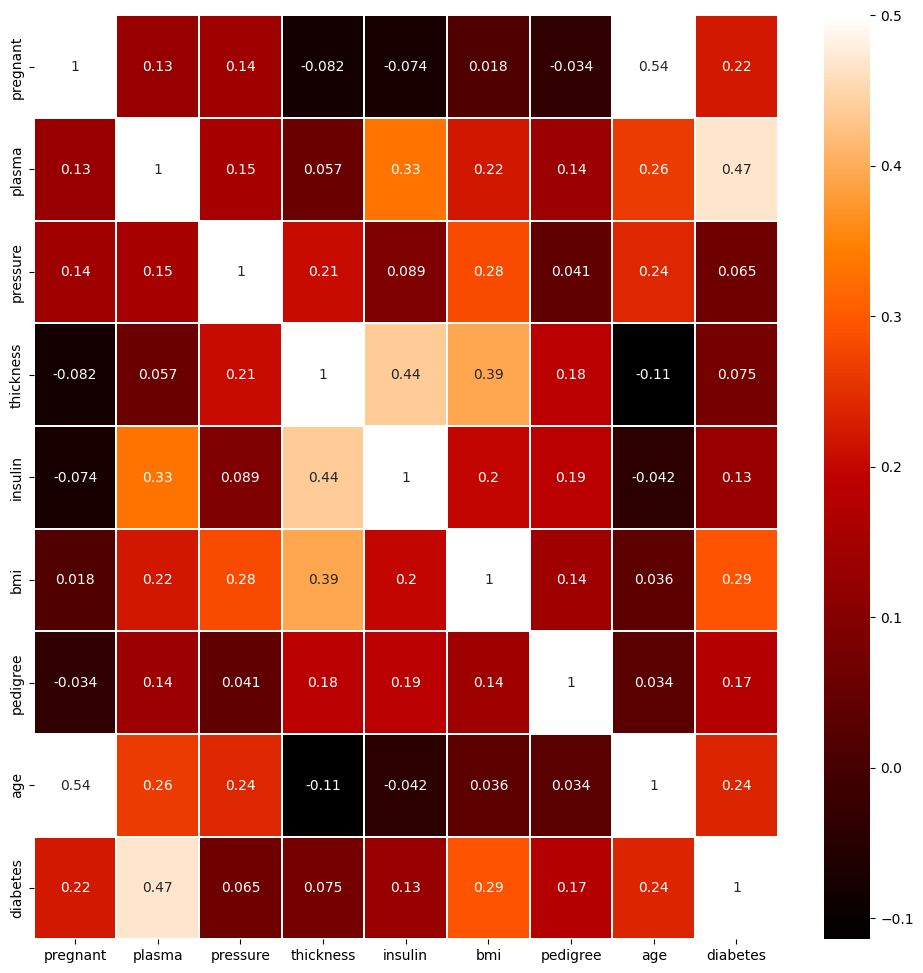

In [55]:
# 데이터프레임의 각 변수 간 상관계수를 히트맵으로 시각화합니다.

colormap = plt.cm.gist_heat    # 색상 맵 스타일 설정
plt.figure(figsize=(12, 12))   # 그래프 크기 지정

# 히트맵 속성 설정
# - linewidths: 셀 경계선 두께
# - vmax=0.5: 최대 색상 강도 (0.5 이상은 동일 색으로 표시)
# - cmap: 색상 구성
# - linecolor: 셀 경계선 색
# - annot=True: 각 셀에 상관계수 값 표시
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap,
            linecolor='white', annot=True)

plt.show()


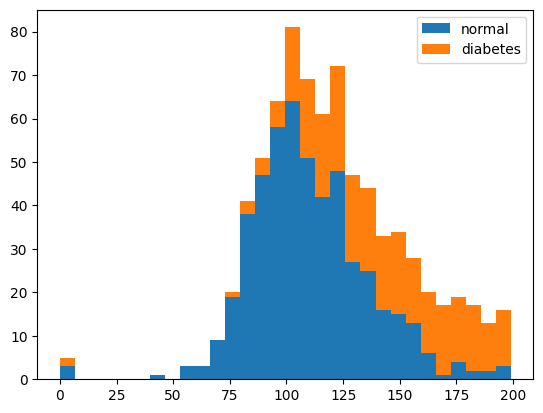

In [56]:
# 'plasma' 변수 기준으로 정상(0)과 당뇨(1) 그룹의 분포를 히스토그램으로 비교합니다.
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]],
         bins=30,              # 구간(bin) 개수
         histtype='barstacked',# 막대를 쌓아서 표시
         label=['normal','diabetes'])  # 범례 라벨
plt.legend()


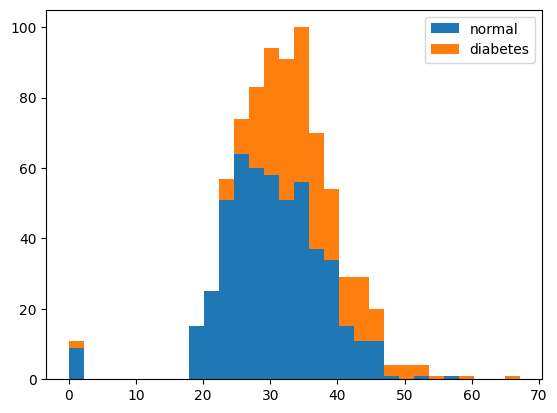

In [57]:
# 'bmi' 변수를 기준으로 정상(0)과 당뇨(1) 그룹의 분포를 히스토그램으로 비교합니다.
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]],
         bins=30,               # 히스토그램 구간(bin) 개수
         histtype='barstacked', # 막대를 쌓아서 표시
         label=['normal','diabetes'])  # 범례 라벨
plt.legend()


In [58]:
from tensorflow.keras.models import Sequential   # 순차적 신경망 모델
from tensorflow.keras.layers import Dense        # 완전 연결(Dense) 층

import pandas as pd  # 데이터 처리를 위한 pandas

# CSV 파일을 불러와 데이터프레임으로 저장합니다. (피마 인디언 당뇨병 데이터셋)
df = pd.read_csv('data/pima-indians-diabetes3.csv')


In [59]:
# 입력 변수(X): 데이터프레임의 앞 8개 열을 선택합니다.
X = df.iloc[:, 0:8]

# 출력 변수(y): 마지막 열(당뇨병 여부)을 선택합니다.
y = df.iloc[:, 8]


In [60]:
# 신경망 모델을 정의합니다.
model = Sequential()

# 첫 번째 은닉층: 입력 변수 8개 → 뉴런 12개, 활성화 함수 ReLU
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))

# 두 번째 은닉층: 뉴런 8개, 활성화 함수 ReLU
model.add(Dense(8, activation='relu', name='Dense_2'))

# 출력층: 뉴런 1개, 활성화 함수 sigmoid (이진 분류 확률 출력)
model.add(Dense(1, activation='sigmoid', name='Dense_3'))

# 모델 구조 요약 출력
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [61]:
# 모델 학습 방법을 설정합니다.
# - 손실 함수: binary_crossentropy (이진 분류 문제용)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도(accuracy)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습을 수행합니다.
# - epochs=100 : 전체 데이터셋을 100번 반복 학습
# - batch_size=5 : 한 번에 5개 샘플씩 학습
history = model.fit(X, y, epochs=100, batch_size=5)


Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5563 - loss: 5.1296
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5832 - loss: 1.1458
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6492 - loss: 0.8986
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6570 - loss: 0.7766
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6292 - loss: 0.7958
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6801 - loss: 0.6626
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6388 - loss: 0.6957
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6671 - loss: 0.7095
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6980 - loss: 0.7312
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6677 - loss: 0.6333
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6498 - loss: 0.6604
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━

다중 분류문제

In [62]:
#import pandas as pd
#uploaded = files.upload()


In [63]:
df = pd.read_csv('data/iris3.csv')

In [64]:
# 데이터프레임의 상위 5행을 출력하여 데이터 구조를 확인합니다.
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


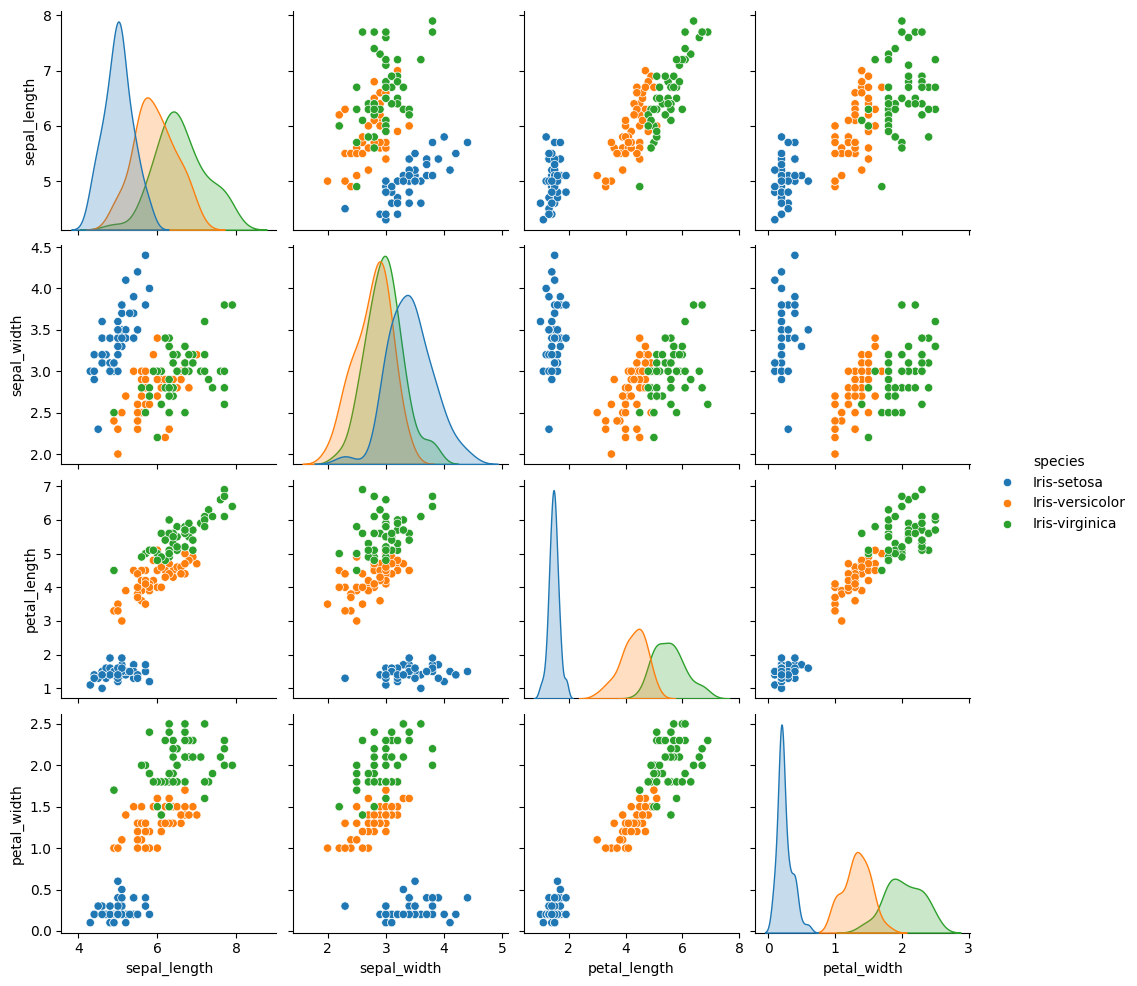

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 특성(feature) 쌍의 산점도를 그려 종(species)별 분포를 시각화합니다.
sns.pairplot(df, hue='species')

plt.show()


In [66]:
# 입력 변수(X): 데이터프레임의 앞 4개 열 선택
X = df.iloc[:, 0:4]

# 출력 변수(y): 마지막 열(품종 정보) 선택
y = df.iloc[:, 4]

# 입력 변수와 출력 변수의 상위 5행을 확인합니다.
print(X[0:5])
print(y[0:5])


   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [67]:
# 출력 변수(y)를 원-핫 인코딩하여 각 클래스(품종)를 이진 벡터 형태로 변환합니다.
y = pd.get_dummies(y)

# 변환된 결과의 상위 5행을 확인합니다.
print(y[0:5])


   Iris-setosa  Iris-versicolor  Iris-virginica
0         True            False           False
1         True            False           False
2         True            False           False
3         True            False           False
4         True            False           False


소프트맥스

In [68]:
# 필요한 Keras 모듈 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 신경망 모델 정의
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))  # 첫 번째 은닉층 (입력 4 → 뉴런 12)
model.add(Dense(8, activation='relu'))                # 두 번째 은닉층 (뉴런 8)
model.add(Dense(3, activation='softmax'))             # 출력층 (3개 클래스, softmax 확률 출력)
model.summary()

# 모델 컴파일
# - 손실 함수: categorical_crossentropy (다중 클래스 분류용)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도(accuracy)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
# - epochs=30 : 전체 데이터셋을 30번 반복 학습
# - batch_size=5 : 한 번에 5개 샘플씩 학습
history = model.fit(X, y, epochs=30, batch_size=5)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3549 - loss: 2.0065
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3017 - loss: 1.3011
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3510 - loss: 1.0801
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6328 - loss: 0.9839
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6603 - loss: 0.9150
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7062 - loss: 0.8055
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6837 - loss: 0.7612
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6909 - loss: 0.6895
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6585 - loss: 0.6776
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6112 - loss: 0.6667
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7063 - loss: 0.5584
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7490 - lo

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/iris3.csv')

# 입력 변수(X)와 출력 변수(y)를 분리합니다.
X = df.iloc[:, 0:4]   # 앞 4개 열: 꽃받침/꽃잎 길이·너비 등 연속형 특성
y = df.iloc[:, 4]     # 마지막 열: 품종 레이블

# 출력 변수(y)를 원-핫 인코딩하여 다중 클래스 분류에 적합한 형식으로 변환합니다.
y = pd.get_dummies(y)

# 신경망 모델을 정의합니다.
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))  # 은닉층 1: 입력 4 → 뉴런 12
model.add(Dense(8,  activation='relu'))               # 은닉층 2: 뉴런 8
model.add(Dense(3,  activation='softmax'))            # 출력층: 클래스 3개, 확률 출력
model.summary()

# 모델 학습 방법을 설정합니다.
# - 손실 함수



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
# 모델 학습 방법을 설정합니다.
# - 손실 함수: categorical_crossentropy (다중 클래스 분류용)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도(accuracy)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 학습합니다. (전체 데이터 30 epoch, 배치 크기 5)
history = model.fit(X, y, epochs=30, batch_size=5)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3891 - loss: 1.6934
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4880 - loss: 1.1932
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3777 - loss: 1.0751
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3037 - loss: 1.0107
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3253 - loss: 0.9126
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4116 - loss: 0.8225
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6253 - loss: 0.7728
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7452 - loss: 0.7226
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7664 - loss: 0.6466
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8171 - loss: 0.5938
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9056 - loss: 0.5579
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8970 - lo

모델 성능검증

In [71]:
#import pandas as pd
#uploaded = files.upload()

In [72]:


# 데이터 입력
df = pd.read_csv('data/sonar3.csv', header=None)

# 첫 5줄을 봅니다.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [73]:
# 마지막 열(열 인덱스 60)에 저장된 클래스 분포를 확인합니다.
# 0: 일반 암석, 1: 광석
df[60].value_counts()


,count
60,
1,111
0,97


In [74]:
# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 신경망 모델 정의
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))  # 은닉층 1: 입력 60개 → 뉴런 24개
model.add(Dense(10, activation='relu'))                # 은닉층 2: 뉴런 10개
model.add(Dense(1, activation='sigmoid'))              # 출력층: 뉴런 1개 (이진 분류 확률 출력)

# 모델 컴파일
# - 손실 함수: binary_crossentropy (이진 분류용)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도(accuracy)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
# - epochs=200 : 데이터 전체를 200번 반복 학습
# - batch_size=10 : 1회 학습 시 샘플 10개씩 처리
history = model.fit(X, y, epochs=200, batch_size=10)


Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5707 - loss: 0.6789
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5398 - loss: 0.6779
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5818 - loss: 0.6699 
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6494 - loss: 0.6483 
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7279 - loss: 0.6087 
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7071 - loss: 0.5965 
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7140 - loss: 0.5877 
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7725 - loss: 0.5534 
Epoch 9/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7655 - loss: 0.5424 
Epoch 10/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7518 - loss: 0.5498 
Epoch 11/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8064 - loss: 0.4868 
Epoch 12/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [76]:
# 사이킷런(scikit-learn) 라이브러리를 설치합니다.
# (머신러닝 모델 학습, 데이터 전처리, 평가 등에 활용)
!pip install scikit-learn


In [77]:
from tensorflow.keras.models import Sequential    # 순차적 신경망 모델 클래스
from tensorflow.keras.layers import Dense         # 완전 연결(Dense) 층
from sklearn.model_selection import train_test_split  # 훈련/테스트 데이터 분할 함수

import pandas as pd   # 데이터프레임 형태로 데이터 처리


In [78]:
# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [79]:
# 데이터를 학습용(70%)과 테스트용(30%)으로 분리합니다.
# - test_size=0.3 : 전체 데이터의 30%를 테스트 세트로 사용
# - shuffle=True  : 분리하기 전에 데이터를 무작위로 섞음
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)



In [80]:
# 신경망 모델 정의
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))  # 첫 번째 은닉층 (입력 60차원 → 뉴런 24개)
model.add(Dense(10, activation='relu'))                # 두 번째 은닉층 (뉴런 10개)
model.add(Dense(1, activation='sigmoid'))              # 출력층 (이진 분류 확률 출력)

# 모델 컴파일
# - 손실 함수: binary_crossentropy (이진 분류 문제용)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도(accuracy)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
# - epochs=200 : 전체 데이터를 200번 반복 학습
# - batch_size=10 : 한 번에 10개 샘플씩 학습
history = model.fit(X_train, y_train, epochs=200, batch_size=10)



Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.5350 - loss: 0.6881
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7030 - loss: 0.6649   
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7786 - loss: 0.6500 
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7255 - loss: 0.6415 
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7532 - loss: 0.6255 
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7547 - loss: 0.6125 
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6942 - loss: 0.6271 
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7718 - loss: 0.5846 
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7105 - loss: 0.5960 
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7596 - loss: 0.5868 
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7638 - loss: 0.5535 
Epoch 12/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [81]:
# 테스트 세트를 사용해 모델 성능(손실 값과 정확도)을 평가합니다.
score = model.evaluate(X_test, y_test)

# 정확도(accuracy) 지표를 출력합니다.
print('Test accuracy:', score[1])


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - accuracy: 0.7897 - loss: 0.5523
Test accuracy: 0.8095238208770752


모델 저장하기.

In [82]:
import os
print(os.getcwd())

/content/202508_LG


In [83]:
# 학습이 완료된 모델을 파일로 저장합니다.
# - '/content/' : 구글 코랩 세션의 기본 작업 디렉터리
# - 'my_model.keras' : 저장될 모델 파일 이름
#   (세션 종료 시 파일은 사라지므로, 오래 보관하려면 Google Drive에 저장해야 함)
model.save('/content/my_model.keras')


In [84]:
# Keras에서 모델 정의 및 불러오기에 필요한 클래스를 불러옵니다.
from tensorflow.keras.models import Sequential   # 순차적으로 층을 쌓는 신경망 모델
from tensorflow.keras.models import load_model   # 저장된 모델을 불러오는 함수


In [85]:
# 메모리에 있던 모델을 지웁니다. (저장·불러오기 테스트를 위해 사용)
del model


In [86]:
# /content 폴더에 저장된 모델 파일을 다시 불러옵니다.
model = load_model('/content/my_model.keras')

# 불러온 모델을 테스트 데이터로 평가하여 손실 값과 정확도를 반환합니다.
score = model.evaluate(X_test, y_test)

# 정확도만 출력합니다.
print('Test accuracy:', score[1])


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.7897 - loss: 0.5523
Test accuracy: 0.8095238208770752


교차검증

In [87]:
from tensorflow.keras.models import Sequential     # 순차적 신경망 모델
from tensorflow.keras.layers import Dense          # 완전연결(Dense) 층
from sklearn.model_selection import KFold          # 교차검증 분할 도구
from sklearn.metrics import accuracy_score         # 분류 정확도 계산 함수

# 입력 변수(X): 앞의 60개 열(음파 관련 수치 특성)
X = df.iloc[:, 0:60]

# 출력 변수(y): 마지막 열(광물 라벨; 0=암석, 1=광석 등)
y = df.iloc[:, 60]


In [88]:
from tensorflow.keras import Input
# 교차 검증에서 몇 겹(n_splits)으로 나눌지를 설정합니다.
k = 5

# KFold 객체 생성 (데이터를 k겹으로 나누고, 무작위로 섞어서 분할)
kfold = KFold(n_splits=k, shuffle=True)

# 각 검증에서 계산된 정확도를 저장할 리스트
acc_score = []

# 모델 생성 함수 (호출할 때마다 새로운 모델을 반환)
def model_fn():
    model = Sequential()
    model.add(Input(shape=(60,)))                 # 입력 크기 명시
    model.add(Dense(24, activation='relu'))       # 은닉층 1
    model.add(Dense(10, activation='relu'))       # 은닉층 2
    model.add(Dense(1, activation='sigmoid'))     # 출력층
    return model

# K겹 교차 검증 실행
for train_index, test_index in kfold.split(X):
    # 학습셋과 테스트셋 분리
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 모델 생성 및 컴파일
    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # 모델 학습 (verbose=0 → 학습 과정 출력 생략)
    history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)

    # 테스트셋으로 모델 성능 평가 (정확도만 가져오기)
    accuracy = model.evaluate(X_test, y_test)[1]
    acc_score.append(accuracy)  # 리스트에 정확도 기록

# k번 평가된 정확도의 평균 계산
avg_acc_score = sum(acc_score) / k

# 결과 출력
print('각 분할 정확도:', acc_score)
print('평균 정확도:', avg_acc_score)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.7842 - loss: 0.6421
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.7842 - loss: 1.5340
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.7738 - loss: 1.0879
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step - accuracy: 0.6740 - loss: 0.7154
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.8666 - loss: 0.4186
각 분할 정확도: [0.7857142686843872, 0.7857142686843872, 0.7857142686843872, 0.6829268336296082, 0.8780487775802612]
평균 정확도: 0.7836236834526062


모델 성능 개선

In [89]:
import warnings

# 실행 중 발생하는 경고 메시지를 출력하지 않도록 설정합니다.
# (모델 학습 과정에서 불필요한 경고가 화면에 보이지 않게 하기 위함)
warnings.filterwarnings('ignore')


In [90]:
from tensorflow.keras.models import Sequential    # 순차적으로 층을 쌓는 신경망 모델
from tensorflow.keras.layers import Dense         # 완전 연결(Dense) 층
from sklearn.model_selection import train_test_split  # 학습용/테스트용 데이터 분리 함수
import pandas as pd   # CSV 불러오기, 데이터프레임 처리


In [91]:
#import pandas as pd
#uploaded = files.upload()

In [92]:
df = pd.read_csv('data/wine.csv', header=None)

In [93]:
# 데이터의 앞부분 5행 미리보기
df.head()

# 데이터의 뒷부분 5행 확인
df.tail()

# 데이터프레임의 요약 정보 확인 (행·열 수, 결측치, 데이터 타입 등)
df.info()

# 각 열의 기초 통계 확인
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [94]:
# 입력 변수(X): 데이터프레임의 앞 12개 열 (와인의 속성 값들)
X = df.iloc[:, 0:12]

# 출력 변수(y): 마지막 열 (와인의 분류 레이블)
y = df.iloc[:, 12]


In [95]:
# 데이터를 학습셋(80%)과 테스트셋(20%)으로 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 신경망 모델 구조 정의
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))  # 입력 12개 → 은닉층 30개 노드
model.add(Dense(12, activation='relu'))                # 은닉층 2: 노드 12개
model.add(Dense(8, activation='relu'))                 # 은닉층 3: 노드 8개
model.add(Dense(1, activation='sigmoid'))              # 출력층: 노드 1개 (이진 분류 확률)
model.summary()

# 모델 학습 설정
# - 손실 함수: binary_crossentropy (이진 분류용)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습 실행
# - epochs=50 : 전체 데이터 50번 반복 학습
# - batch_size=500 : 학습 시 한 번에 500개 샘플씩 사용
# - validation_split=0.25 : 학습셋 중 25%를 검증용으로 사용 (전체 데이터의 약 20%)
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 236ms/step - accuracy: 0.7394 - loss: 0.5601 - val_accuracy: 0.7662 - val_loss: 0.4461
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7554 - loss: 0.4411 - val_accuracy: 0.7662 - val_loss: 0.3873
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7441 - loss: 0.3986 - val_accuracy: 0.7662 - val_loss: 0.3663
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7518 - loss: 0.3650 - val_accuracy: 0.7715 - val_loss: 0.3420
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7612 - loss: 0.3486 - val_accuracy: 0.8285 - val_loss: 0.3181
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8234 - loss: 0.3332 - val_accuracy: 0.8854 - val_loss: 0.2942
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8907 - loss: 0.2933 - val_accuracy: 0.9123 - val_loss: 0.2730
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9193 - loss: 0.2804 - val_accuracy: 0.9300 - val_loss: 0.2566

In [96]:
# 테스트셋을 사용해 모델 성능(손실과 정확도)을 평가합니다.
score = model.evaluate(X_test, y_test)

# 정확도(accuracy) 지표만 출력합니다.
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9420 - loss: 0.1624
Test accuracy: 0.944615364074707


모델 업데이트

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint # 매번 모델을 체크해서 저장을 도움
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일 불러오기 (와인 데이터셋, 헤더 없음)
df = pd.read_csv('./data/wine.csv', header=None)

# 입력 변수(X): 앞의 12개 열 (와인의 속성 값)
X = df.iloc[:, 0:12]

# 출력 변수(y): 마지막 열 (와인의 분류 레이블)
y = df.iloc[:, 12]

# 데이터를 학습용(80%)과 테스트용(20%)으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 신경망 모델 구조 정의
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))  # 은닉층 1: 입력 12개 → 노드 30개
model.add(Dense(12, activation='relu'))                # 은닉층 2: 노드 12개
model.add(Dense(8, activation='relu'))                 # 은닉층 3: 노드 8개
model.add(Dense(1, activation='sigmoid'))              # 출력층: 노드 1개 (이진 분류 확률 출력)
model.summary()

# 모델 학습 설정
# - 손실 함수: binary_crossentropy (이진 분류용)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# 모델 저장 폴더를 생성합니다. (이미 있으면 건너뜁니다)
# Colab 환경에서는 '/content' 디렉토리가 기본 작업 경로입니다.
model_dir = '/content/model/all'
os.makedirs(model_dir, exist_ok=True)

# 모델 저장 조건을 설정합니다.
# - {epoch:02d} : 현재 학습 epoch 번호를 2자리 정수로 저장
# - {val_accuracy:.4f} : 검증 정확도를 소수점 4자리까지 표시
# 결과적으로 '01-0.8123.keras' 같은 파일 이름이 저장됩니다.
modelpath = os.path.join(model_dir, '{epoch:02d}-{val_accuracy:.4f}.keras')
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델 학습을 실행합니다.
# - epochs=50 : 전체 데이터셋으로 50회 반복 학습
# - batch_size=500 : 학습 시 한 번에 500개 샘플씩 사용
# - validation_split=0.25 : 학습 데이터의 25%를 검증용으로 사용
# - callbacks=[checkpointer] : 매 epoch마다 모델을 저장 (파일명에 epoch, 검증 정확도 기록)
# 결과적으로 '/content/model/all' 폴더 안에 epoch별 모델 파일(.keras)이 여러 개 생성됩니다.
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=500,
    validation_split=0.25,
    verbose=0,
    callbacks=[checkpointer]
)



Epoch 1: saving model to /content/model/all/01-0.7408.keras

Epoch 2: saving model to /content/model/all/02-0.8892.keras

Epoch 3: saving model to /content/model/all/03-0.9231.keras

Epoch 4: saving model to /content/model/all/04-0.9085.keras

Epoch 5: saving model to /content/model/all/05-0.9262.keras

Epoch 6: saving model to /content/model/all/06-0.9269.keras

Epoch 7: saving model to /content/model/all/07-0.9246.keras

Epoch 8: saving model to /content/model/all/08-0.9300.keras

Epoch 9: saving model to /content/model/all/09-0.9292.keras

Epoch 10: saving model to /content/model/all/10-0.9292.keras

Epoch 11: saving model to /content/model/all/11-0.9292.keras

Epoch 12: saving model to /content/model/all/12-0.9315.keras

Epoch 13: saving model to /content/model/all/13-0.9323.keras

Epoch 14: saving model to /content/model/all/14-0.9308.keras

Epoch 15: saving model to /content/model/all/15-0.9315.keras

Epoch 16: saving model to /content/model/all/16-0.9308.keras

Epoch 17: saving

In [99]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9716 - loss: 0.1123
Test accuracy: 0.9638461470603943


과적합 점검

In [100]:
# 과적합 여부를 확인하기 위해 긴 학습을 수행합니다.
# - epochs=2000 : 전체 데이터를 2000번 반복 학습 (매우 큰 값 → 시간이 오래 걸릴 수 있음)
# - batch_size=500 : 학습 시 한 번에 500개 샘플 사용
# - verbose=0 : 학습 과정 출력 생략
# - validation_split=0.25 : 학습 데이터의 25%를 검증용으로 사용
# 결과: 학습 손실/정확도와 검증 손실/정확도를 비교하여 과적합 여부를 그래프로 확인할 수 있습니다.
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)


In [101]:
# history 객체에 저장된 학습 과정을 DataFrame으로 변환합니다.
# - loss : 훈련 손실
# - accuracy : 훈련 정확도
# - val_loss : 검증 손실
# - val_accuracy : 검증 정확도
hist_df = pd.DataFrame(history.history)

# DataFrame 출력 (epoch별 학습 결과를 행 단위로 확인 가능)
hist_df



,accuracy,loss,val_accuracy,val_loss
0,0.952528,0.129526,0.940769,0.143843
1,0.953554,0.128639,0.946923,0.142025
2,0.953554,0.127098,0.945385,0.141289
3,0.952528,0.125059,0.947692,0.140417
4,0.954067,0.123932,0.948462,0.138974
...,...,...,...,...
1995,0.994355,0.022182,0.984615,0.091933
1996,0.993585,0.023020,0.984615,0.093972
1997,0.992558,0.025161,0.985385,0.092618
1998,0.991275,0.029461,0.985385,0.091330


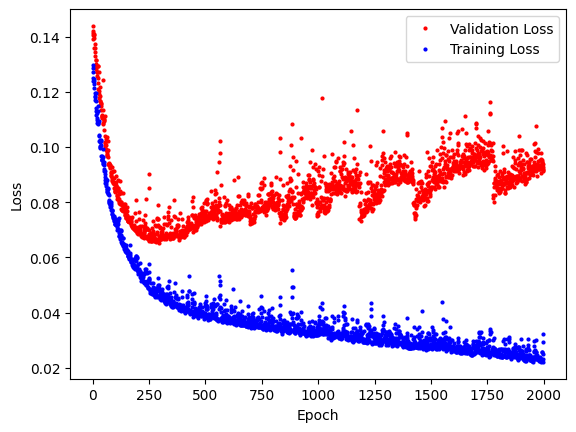

In [102]:
# 검증셋 손실(val_loss)과 학습셋 손실(loss)을 각각 추출합니다.
y_vloss = hist_df['val_loss']   # 검증 손실
y_loss  = hist_df['loss']       # 학습 손실

# x축 값(에포크 번호)을 지정합니다.
x_len = np.arange(len(y_loss))

# 손실 그래프 그리기
# - 검증 손실: 빨간색 점
# - 학습 손실: 파란색 점
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Validation Loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Training Loss')

# 범례, 축 레이블, 출력
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


학습 자동중단

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# CSV 파일 불러오기 (와인 데이터셋, 헤더 없음)
df = pd.read_csv('./data/wine.csv', header=None)

# 입력 변수(X): 앞의 12개 열 (와인의 화학적 속성 값들)
X = df.iloc[:, 0:12]

# 출력 변수(y): 마지막 열 (와인의 분류 레이블, 이진 분류)
y = df.iloc[:, 12]

# 데이터를 학습용(80%)과 테스트용(20%)으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 신경망 모델 구조 정의
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))  # 은닉층 1: 입력 12차원 → 노드 30개
model.add(Dense(12, activation='relu'))                # 은닉층 2: 노드 12개
model.add(Dense(8, activation='relu'))                 # 은닉층 3: 노드 8개
model.add(Dense(1, activation='sigmoid'))              # 출력층: 노드 1개 (이진 분류 확률 출력)
model.summary()

# 모델 학습 설정
# - 손실 함수: binary_crossentropy (이진 분류 문제에 적합)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도(accuracy)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
# 조기 종료(EarlyStopping) 설정
# - monitor='val_loss' : 검증 손실(val_loss)을 기준으로 개선 여부를 확인
# - patience=20 : 20 epoch 연속으로 개선되지 않으면 학습을 자동 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델 저장 경로 지정
# Colab에서는 '/content' 경로를 기본으로 사용 → 필요시 Google Drive로 변경 가능
modelpath = "/content/bestmodel.keras"

# ModelCheckpoint 설정
# - monitor='val_loss' : 검증 손실 기준으로 가장 좋은 모델만 저장
# - save_best_only=True : 최적 성능의 모델만 저장 (매 epoch마다 덮어쓰기)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 모델 학습 실행
# - epochs=2000 : 최대 2000 epoch 학습 (하지만 EarlyStopping으로 조기 종료될 수 있음)
# - batch_size=500 : 한 번에 500개 샘플씩 학습
# - validation_split=0.25 : 학습 데이터의 25%를 검증용으로 사용
# - callbacks : EarlyStopping과 ModelCheckpoint 동시 적용
# 결과: 검증 손실이 가장 낮을 때의 모델이 '/content/Ch14-4-bestmodel.keras' 파일로 저장됨
history = model.fit(
    X_train, y_train,
    epochs=2000,
    batch_size=500,
    validation_split=0.25,
    verbose=1,
    callbacks=[early_stopping_callback, checkpointer]
)



Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 0.2430 - loss: 10.6207 - val_accuracy: 0.2462 - val_loss: 6.7258
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2479 - loss: 5.6171 - val_accuracy: 0.2462 - val_loss: 2.1407
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3409 - loss: 1.4815 - val_accuracy: 0.8600 - val_loss: 0.3740
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8564 - loss: 0.3449 - val_accuracy: 0.8546 - val_loss: 0.3147
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8606 - loss: 0.2991 - val_accuracy: 0.8931 - val_loss: 0.2883
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9062 - loss: 0.2681 - val_accuracy: 0.9100 - val_loss: 0.2703
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9148 - loss: 0.2591 - val_accuracy: 0.9077 - val_loss: 0.2506
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9150 - loss: 0.2512 - val_accuracy: 0.9123 -

In [105]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9840 - loss: 0.0544
Test accuracy: 0.9853846430778503


In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


In [107]:
#import pandas as pd
#uploaded = files.upload()

In [108]:
#데이터를 불러 옵니다.
df = pd.read_csv("data/house_train.csv")

#데이터를 미리 살펴 보겠습니다.
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [109]:
# 데이터프레임 각 열의 데이터 타입을 확인합니다.
# 예: int64(정수형), float64(실수형), object(문자열/범주형) 등으로 표시됩니다.
df.dtypes


,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [110]:
#속성별로 결측치가 몇 개인지 확인합니다.
df.isnull().sum().sort_values(ascending=False).head(20)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [111]:
# 범주형(문자열) 변수를 원-핫 인코딩하여 0과 1로 이루어진 더미 변수로 변환합니다.
df = pd.get_dummies(df)

# 결측치(NaN)를 각 열의 평균값으로 대체하여 채웁니다.
df = df.fillna(df.mean())

# 전처리가 완료된 데이터프레임을 확인합니다.
df


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


In [112]:
# 각 열(속성) 간의 상관계수를 계산합니다.
df_corr = df.corr()

# 'SalePrice'와의 상관계수를 기준으로 내림차순 정렬합니다.
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)

# 집값(SalePrice)과 상관관계가 큰 상위 10개 속성을 출력합니다.
df_corr_sort['SalePrice'].head(10)


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
BsmtQual_Ex,0.553105
TotRmsAbvGrd,0.533723


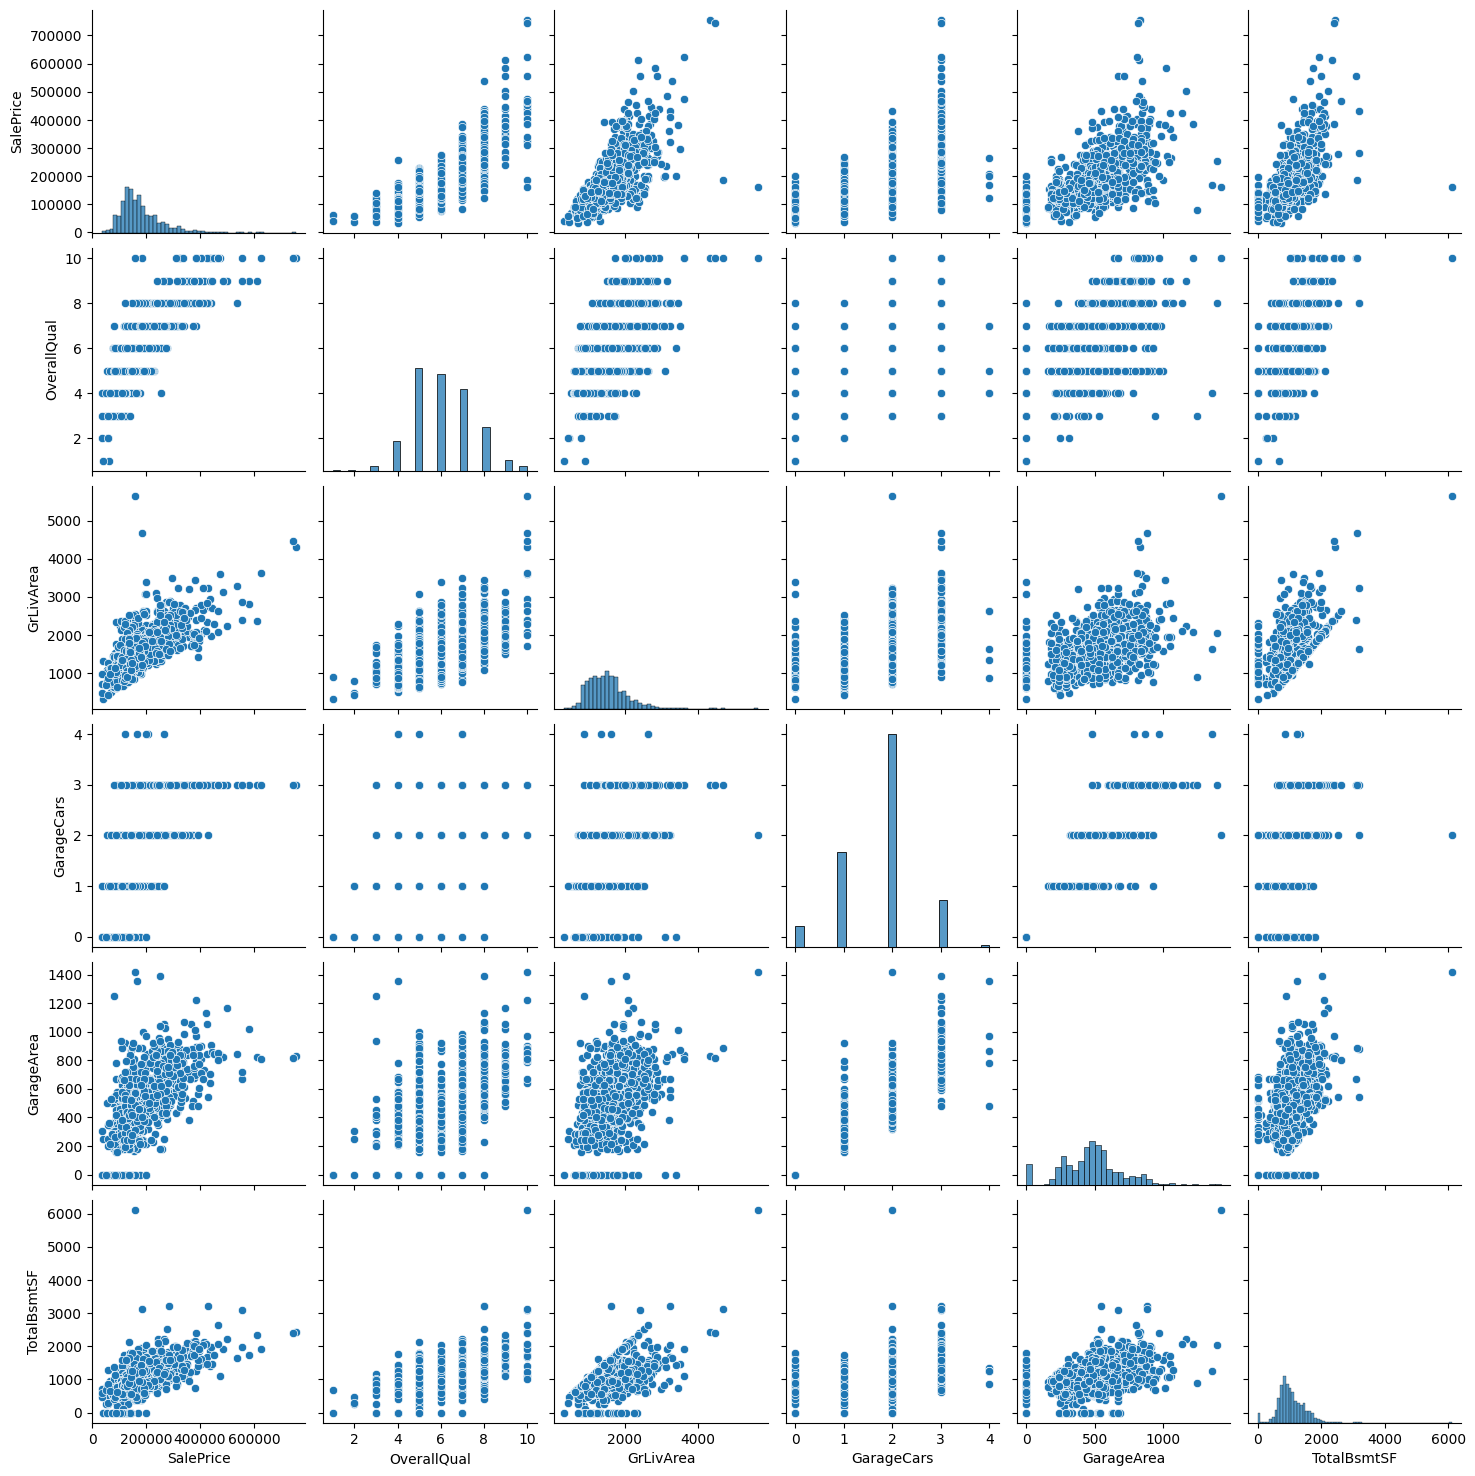

In [113]:
# 집값(SalePrice)과 상관관계가 높은 주요 변수들을 선택합니다.
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']

# 선택한 변수들 간의 쌍별 산점도와 히스토그램을 그립니다.
sns.pairplot(df[cols])

# 그래프 출력
plt.show()


In [114]:
# 집값 예측에 사용할 입력 변수(특징)들을 선택합니다.
# 집값(SalePrice)은 제외하고, 상관관계가 높은 주요 변수 5개만 사용합니다.
cols_train = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
X_train_pre = df[cols_train]

# 출력 변수(y): 예측 대상인 집값(SalePrice)을 배열로 저장합니다.
y = df['SalePrice'].values


In [115]:
# 데이터를 학습셋(80%)과 테스트셋(20%)으로 분리합니다.
# - X_train, y_train : 모델 학습에 사용될 데이터
# - X_test, y_test   : 모델 평가에 사용될 데이터
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)


In [ ]:
# 모델의 구조를 정의합니다.
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # 입력 특성 개수 → 노드 10개
model.add(Dense(30, activation='relu'))                              # 은닉층 2: 노드 30개
model.add(Dense(40, activation='relu'))                              # 은닉층 3: 노드 40개
model.add(Dense(1))                                                  # 출력층: 노드 1개 (집값 예측)
model.summary()

# 모델 학습 설정
# - 최적화 알고리즘: Adam
# - 손실 함수: 평균제곱오차(mean_squared_error, 회귀 문제용)
model.compile(optimizer='adam', loss='mean_squared_error')

# 조기 종료(EarlyStopping) 설정
# - monitor='val_loss' : 검증 손실을 기준으로 관찰
# - patience=20 : 20 epoch 연속 개선되지 않으면 학습을 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델 저장 경로 설정
# Colab에서는 '/content' 경로를 기본으로 사용하는 것이 안전합니다.
modelpath = "/content/house.keras"

# 최적 모델 저장 설정
# - monitor='val_loss' : 검증 손실 기준으로 성능이 가장 좋은 모델 저장
# - save_best_only=True : 가장 성능 좋은 모델만 갱신 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 모델 학습 실행
# - validation_split=0.25 : 학습 데이터의 25%를 검증용으로 사용
# - epochs=200 : 최대 200 epoch 학습 (하지만 조기 종료 가능)
# - batch_size=32 : 한 번에 32개 샘플씩 학습
# - callbacks : 조기 종료와 최적 모델 저장 기능 적용
# 결과: '/content/house.keras' 파일에 검증 성능이 가장 좋은 모델이 저장됨
history = model.fit(
    X_train, y_train,
    validation_split=0.25,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping_callback, checkpointer]
)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 40)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,671 (6.53 KB)

 Trainable params: 1,671 (6.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 40115494912.0000 - val_loss: 37031407616.0000
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39694282752.0000 - val_loss: 36533886976.0000
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41046622208.0000 - val_loss: 35330383872.0000
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39108628480.0000 - val_loss: 32496627712.0000
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32506140672.0000 - val_loss: 26759913472.0000
Epoch 6/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28483448832.0000 - val_loss: 17591572480.0000
Epoch 7/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16368917504.0000 - val_loss: 7781236736.0000
Epoch 8/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6958562304.0000 - val_loss: 2287075072.0000
Epoch 9/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3080160512.0000 - val_loss: 1618938880.0000
Epoch 10/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss:

In [ ]:
# 예측 결과를 비교·분석하기 위한 리스트를 준비합니다.
# - real_prices : 실제 집값
# - pred_prices : 모델이 예측한 집값
# - X_num       : 실행 번호(1, 2, 3... 순서)
real_prices = []
pred_prices = []
X_num = []

# 테스트셋에서 모델이 예측한 값들을 일차원 배열로 변환합니다.
Y_prediction = model.predict(X_test).flatten()

# 앞에서 25개의 샘플에 대해 실제 값과 예측 값을 비교합니다.
n_iter = 0
for i in range(25):
    real = y_test[i]            # 실제 집값
    prediction = Y_prediction[i] # 예측 집값

    # 실제값과 예측값을 출력
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))

    # 각각의 리스트에 값 추가
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter += 1
    X_num.append(n_iter)        # 실행 번호 기록


In [ ]:
# 샘플 25개의 실제 가격과 예측 가격을 선 그래프로 비교합니다.
plt.plot(X_num, pred_prices, label='Predicted Price')  # 예측 값 (선 그래프)
plt.plot(X_num, real_prices, label='Real Price')       # 실제 값 (선 그래프)

# 범례와 그래프 출력
plt.legend()
plt.xlabel("Sample Number")   # 샘플 번호 (1~25)
plt.ylabel("House Price")     # 집값
plt.title("Comparison of Real vs Predicted Prices")
plt.show()

# 결과 해석:
# - 두 선이 비슷한 위치에 있으면 모델이 집값을 잘 예측한 것.
# - 두 선이 크게 벌어지는 지점은 예측 오차가 큰 샘플을 의미함.


CNN

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러옵니다.
# - X: 이미지 데이터 (28x28 픽셀, 흑백 손글씨 숫자)
# - y: 레이블 (0~9 숫자)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋의 이미지 개수를 확인합니다.
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


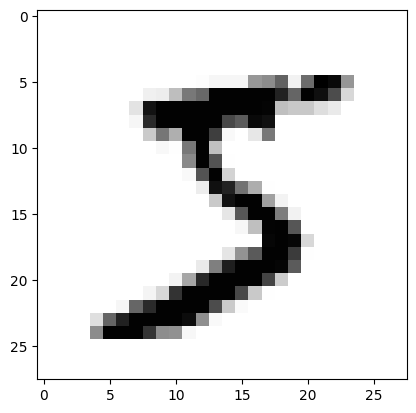

In [2]:
# 학습 데이터의 첫 번째 이미지를 확인합니다.
# - cmap='Greys' : 흑백 이미지로 표시
plt.imshow(X_train[0], cmap='Greys')
plt.show()

# 결과 해석:
# 출력되는 그림은 28x28 픽셀 크기의 손글씨 숫자입니다.
# MNIST 데이터셋이 어떻게 생겼는지 직관적으로 확인할 수 있습니다.


In [3]:
# 첫 번째 이미지 데이터를 숫자 행렬로 출력해 봅니다.
# - 각 픽셀은 0~255 범위의 값으로 표현됩니다.
# - 값이 클수록(255에 가까울수록) 더 진하게 표시됩니다.
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)  # 픽셀 값 출력 (가로로 정렬)
    sys.stdout.write('\n')            # 한 줄 끝나면 줄바꿈

# 결과 해석:
# 출력된 값들이 28행 × 28열로 배치되어, 손글씨 이미지가 숫자 픽셀로 표현됨을 알 수 있습니다.
# 예를 들어, 배경은 0(흰색), 글자가 있는 부분은 큰 값(어두운 색)으로 나타납니다.


0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [4]:
# 입력 데이터(이미지)의 차원 변환
# - 원래 형태: (샘플 수, 28, 28)
# - 변환 형태: (샘플 수, 784) → 28x28 픽셀을 1차원 벡터로 펼침
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')   # 데이터 타입을 float64로 변환
X_train = X_train / 255               # 픽셀 값을 0~1 범위로 정규화

# 테스트셋도 같은 방식으로 변환 및 정규화
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스(라벨) 값 확인
print("class : %d " % (y_train[0]))   # 첫 번째 샘플의 정답 라벨 출력 (예: 5)

# 출력 변수(라벨)를 원-핫 인코딩으로 변환
# - to_categorical(y, 10) → 숫자 라벨을 길이 10짜리 벡터로 변환
# - 예: 숫자 5 → [0 0 0 0 0 1 0 0 0 0]
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 변환된 첫 번째 라벨 확인
print(y_train[0])


class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터셋 로드
# - X: 28x28 흑백 손글씨 이미지
# - y: 정답 레이블(0~9)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 입력 데이터 전처리
# - (N, 28, 28) → (N, 784)로 펼치기
# - float32로 형변환 후 0~1 범위로 정규화
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test  = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# 레이블을 원-핫 벡터로 변환 (예: 5 → [0,0,0,0,0,1,0,0,0,0])
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# 신경망 모델 정의
# - 입력 784차원 → 은닉층 512(ReLU) → 출력 10(softmax, 다중 분류 확률)
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 구조 요약 출력
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 모델 학습 설정
# - 손실 함수: categorical_crossentropy (다중 분류)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Colab 기본 작업 경로는 '/content'
MODEL_DIR = '/content/model'
os.makedirs(MODEL_DIR, exist_ok=True)   # 디렉토리가 없으면 생성

# 에포크마다 검증 손실(val_loss)이 가장 낮을 때의 모델만 저장
modelpath = os.path.join(MODEL_DIR, "MNIST_MLP.keras")
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 조기 종료: 검증 손실이 10 epoch 연속 개선되지 않으면 학습을 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
# - validation_split=0.25 : 학습 데이터의 25%를 검증용으로 사용
# - epochs=30, batch_size=200 : 기본 학습 설정
# - callbacks : 조기 종료 + 최적 모델 저장
history = model.fit(
    X_train, y_train,
    validation_split=0.25,
    epochs=30,
    batch_size=200,
    verbose=0,
    callbacks=[early_stopping_callback, checkpointer]
)

# 테스트셋 성능 평가(정확도 출력)
print("\nTest Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))




Epoch 1: val_loss improved from inf to 0.18629, saving model to /content/model/MNIST_MLP.keras

Epoch 2: val_loss improved from 0.18629 to 0.13509, saving model to /content/model/MNIST_MLP.keras

Epoch 3: val_loss improved from 0.13509 to 0.11061, saving model to /content/model/MNIST_MLP.keras

Epoch 4: val_loss improved from 0.11061 to 0.10306, saving model to /content/model/MNIST_MLP.keras

Epoch 5: val_loss did not improve from 0.10306

Epoch 6: val_loss improved from 0.10306 to 0.08924, saving model to /content/model/MNIST_MLP.keras

Epoch 7: val_loss improved from 0.08924 to 0.08075, saving model to /content/model/MNIST_MLP.keras

Epoch 8: val_loss did not improve from 0.08075

Epoch 9: val_loss improved from 0.08075 to 0.07976, saving model to /content/model/MNIST_MLP.keras

Epoch 10: val_loss did not improve from 0.07976

Epoch 11: val_loss did not improve from 0.07976

Epoch 12: val_loss did not improve from 0.07976

Epoch 13: val_loss did not improve from 0.07976

Epoch 14: v

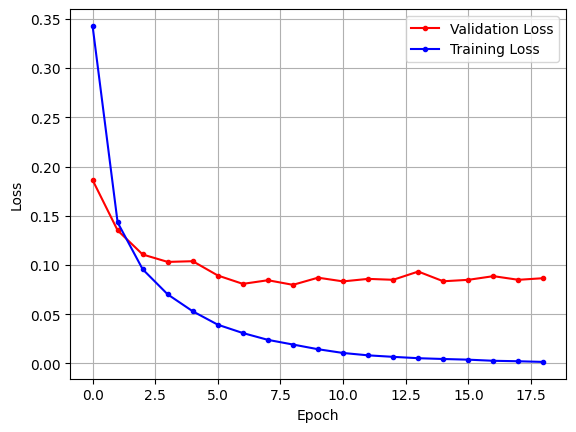

In [7]:
# 학습 과정에서 기록된 손실 값을 가져옵니다.
y_vloss = history.history['val_loss']   # 검증셋 손실
y_loss  = history.history['loss']       # 학습셋 손실

# 에포크(epoch) 수만큼 x축을 만듭니다.
x_len = np.arange(len(y_loss))

# 손실 그래프 그리기
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validation Loss')  # 검증 손실
plt.plot(x_len, y_loss, marker='.', c="blue", label='Training Loss')    # 학습 손실

# 그래프 옵션 (범례, 격자, 레이블)
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 결과 해석:
# - 두 손실 값이 비슷하게 감소하면 학습이 잘 진행되고 있는 것임.
# - 학습 손실은 계속 감소하지만 검증 손실이 일정 시점 이후 증가하면 → 과적합 발생 신호.
# - 이 그래프를 통해 조기 종료(EarlyStopping)와 같은 기법이 필요한 시점을 파악할 수 있음.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터 로드 및 전처리
# - 입력: (N, 28, 28) → (N, 28, 28, 1)로 채널 차원 추가
# - 스케일링: 0~255 → 0~1
# - 레이블: 원-핫 인코딩(10 클래스)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

# 컨볼루션 신경망(CNN) 정의
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))  # 합성곱 1
model.add(Conv2D(64, (3, 3), activation='relu'))                                       # 합성곱 2
model.add(MaxPooling2D(pool_size=(2, 2)))                                              # 최대 풀링
model.add(Dropout(0.25))                                                               # 과적합 완화
model.add(Flatten())                                                                    # 2D → 1D
model.add(Dense(128, activation='relu'))                                               # 완전연결 층
model.add(Dropout(0.5))                                                                # 과적합 완화
model.add(Dense(10, activation='softmax'))                                             # 출력(10 클래스 확률)

# 모델 학습 설정: 다중분류 손실/옵티마이저/지표
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 🔧 Colab 경로 설정: /content 아래에 모델 저장 폴더 생성
MODEL_DIR = '/content/model'
os.makedirs(MODEL_DIR, exist_ok=True)

# 에포크별 검증 손실이 가장 낮을 때의 가중치만 저장
modelpath   = os.path.join(MODEL_DIR, "MNIST_CNN.keras")
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 조기 종료: 검증 손실이 10 epoch 연속 개선되지 않으면 학습 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
# - validation_split=0.25 : 학습셋의 25%를 검증용으로 사용
# - callbacks : 조기 종료 + 최적 모델 저장
history = model.fit(
    X_train, y_train,
    validation_split=0.25,
    epochs=3,
    batch_size=200,
    verbose=0,
    callbacks=[early_stopping_callback, checkpointer]
)

# 테스트셋 정확도 평가
print("\nTest Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 0.09315, saving model to /content/model/MNIST_CNN.keras

Epoch 2: val_loss improved from 0.09315 to 0.06100, saving model to /content/model/MNIST_CNN.keras

Epoch 3: val_loss improved from 0.06100 to 0.04864, saving model to /content/model/MNIST_CNN.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9852 - loss: 0.0455

Test Accuracy: 0.9877


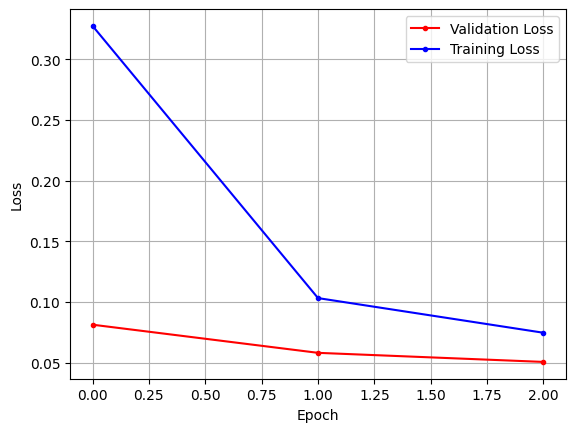

In [8]:
# 학습 과정에서 기록된 손실 값 추출
y_vloss = history.history['val_loss']   # 검증셋 손실
y_loss  = history.history['loss']       # 학습셋 손실

# x축 값(에포크 번호) 생성
x_len = np.arange(len(y_loss))

# 손실 곡선 시각화
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validation Loss')  # 검증 손실
plt.plot(x_len, y_loss, marker='.', c="blue", label='Training Loss')    # 학습 손실

# 그래프 옵션 설정
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 결과 해석:
# - 두 곡선이 함께 낮아지면 학습이 정상적으로 진행됨을 의미합니다.
# - 만약 학습 손실은 계속 줄어드는데 검증 손실이 다시 증가한다면 → 과적합 발생 신호입니다.
# - EarlyStopping을 적용했으므로 검증 손실이 더 이상 개선되지 않으면 자동으로 학습이 중단됩니다.


GAN & 오토인코더

In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import os

# --------------------------------------------------------
# (1) 데이터셋: MNIST 손글씨 숫자 (28x28 흑백 이미지)
#     - 생성자(Generator)와 판별자(Discriminator) 학습에 사용됩니다.
# (2) 레이어/모델:
#     - Dense, Conv2D 등은 GAN의 네트워크 구조를 구성하는데 사용됩니다.
#     - Sequential, Model은 신경망 모델을 정의하기 위한 클래스입니다.
# (3) Adam 옵티마이저:
#     - GAN 학습에서 자주 쓰이는 최적화 알고리즘.
# --------------------------------------------------------

# Colab 기본 디렉터리('/content') 아래에 결과 저장용 폴더 생성
# GAN 학습 도중 생성된 가짜 이미지를 저장하여 학습 경과를 시각적으로 확인할 수 있습니다.
save_dir = "/content/gan_images"
os.makedirs(save_dir, exist_ok=True)  # 폴더가 없으면 자동으로 생성

print(f"생성 이미지가 저장될 경로: {save_dir}")



생성 이미지가 저장될 경로: /content/gan_images


In [10]:
# ================================
# 1. 라이브러리 임포트
# ================================
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

# --------------------------
# Google Colab 경고 방지 팁
# --------------------------
# GPU 메모리 이슈를 피하기 위해 현재 GPU 디바이스 상태 확인 가능
import tensorflow as tf
print("TensorFlow 버전:", tf.__version__)
print("GPU 사용 가능 여부:", "Yes" if tf.config.list_physical_devices('GPU') else "No")

# 랜덤 시드 고정 → 실습 재현성을 위해 설정 (선택사항)
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

# ================================
# 2. 생성자(Generator) 모델 정의
# ================================
# - 역할: 무작위 벡터(노이즈, latent vector) → 가짜 이미지 생성
# - 입력: 100차원 랜덤 벡터 z
# - 출력: (28, 28, 1) 크기의 흑백 이미지 (MNIST 크기)
generator = Sequential(name="Generator")

# (1) 완전연결층: 입력 벡터(100차원) → 128*7*7 노드
#     LeakyReLU: ReLU의 변형으로 음수 입력에 대해 작은 기울기를 허용
generator.add(Dense(128 * 7 * 7, input_dim=100))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())  # 학습 안정화: 활성화 값 정규화

# (2) 1D 벡터 → 3D 텐서 (7x7x128)로 변환
generator.add(Reshape((7, 7, 128)))

# (3) 업샘플링: 해상도 7x7 → 14x14
generator.add(UpSampling2D())

# (4) 컨볼루션: 특징 추출 및 패턴 학습
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU(0.2))

# (5) 업샘플링: 해상도 14x14 → 28x28
generator.add(UpSampling2D())

# (6) 마지막 컨볼루션: 채널 수 1 (MNIST 흑백 이미지)
# tanh 활성화 함수 사용 → 출력값 범위: [-1, 1]
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

# 생성자 요약 출력
generator.summary()

# ================================
# 3. 판별자(Discriminator) 모델 정의
# ================================
# - 역할: 입력 이미지가 진짜인지 가짜인지 판단하는 분류기
# - 입력: (28,28,1) MNIST 흑백 이미지
# - 출력: 진짜(1) 또는 가짜(0)의 확률
discriminator = Sequential(name="Discriminator")

# (1) 합성곱 층: 특징 맵 추출
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same", input_shape=(28, 28, 1)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))  # 과적합 방지

# (2) 두 번째 합성곱 층
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

# (3) 평탄화 후 Dense로 연결 → 시그모이드로 이진 분류
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

# 판별자 학습 설정
# - 손실 함수: binary_crossentropy (진짜 vs 가짜 이진 분류)
# - 옵티마이저: Adam (GAN에서 주로 사용), β1=0.5로 안정성 확보
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
                      metrics=['accuracy'])

# GAN 학습 시 판별자는 동결해야 하므로 일단 비활성화
discriminator.trainable = False

# 판별자 요약 출력
discriminator.summary()

# ================================
# 4. GAN 모델 구성 (Generator + Discriminator)
# ================================
# - 생성자 → 판별자 연결: 생성된 가짜 이미지가 진짜처럼 보이도록 학습
# - 판별자의 가중치는 갱신하지 않음 (discriminator.trainable = False)
g_input = Input(shape=(100,))
d_output = discriminator(generator(g_input))

# GAN 모델: 입력(z) → 출력(진짜일 확률)
gan = Model(g_input, d_output, name="GAN")
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

# GAN 요약 출력
gan.summary()


TensorFlow 버전: 2.19.0
GPU 사용 가능 여부: No


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 6272)           │       633,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 6272)           │        25,088 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 1)      │         1,601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 865,281 (3.30 MB)

 Trainable params: 852,609 (3.25 MB)

 Non-trainable params: 12,672 (49.50 KB)

Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 212,865 (831.50 KB)

Model: "GAN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Generator (Sequential)          │ (None, 28, 28, 1)      │       865,281 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Discriminator (Sequential)      │ (None, 1)              │       212,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,078,146 (4.11 MB)

 Trainable params: 852,609 (3.25 MB)

 Non-trainable params: 225,537 (881.00 KB)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# ===================================
# 1. GAN 학습 함수 정의
# ===================================
def gan_train(epoch, batch_size, saving_interval, start_epoch=0):
    """
    GAN 학습 함수
    -------------------------
    epoch: 전체 학습 반복 횟수
    batch_size: 한 번 학습에 사용할 데이터 개수
    saving_interval: 중간 결과 저장 간격
    start_epoch: 이어서 학습할 경우 시작할 epoch
    """

    # ============================
    # (1) MNIST 데이터 불러오기
    # ============================
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_train = (X_train - 127.5) / 127.5  # [-1, 1] 정규화

    # 진짜/가짜 레이블 생성
    true = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    # ============================
    # (2) 경로 설정 (Colab 환경)
    # ============================
    img_dir = "/content/gan_images"
    ckpt_dir = "/content/gan_checkpoints"
    os.makedirs(img_dir, exist_ok=True)
    os.makedirs(ckpt_dir, exist_ok=True)

    # ============================
    # (3) 체크포인트 불러오기
    # ============================
    ckpt_path = os.path.join(ckpt_dir, f"gan_epoch_{start_epoch}.weights.h5")
    if start_epoch > 0 and os.path.exists(ckpt_path):
        gan.load_weights(ckpt_path)
        print(f"✅ 체크포인트 로드 완료: {ckpt_path}")

    # ============================
    # (4) 학습 루프 시작
    # ============================
    for i in range(start_epoch, epoch):
        # -------------------------------
        # [STEP 1] 판별자 학습
        # -------------------------------
        discriminator.trainable = True

        # 1) 실제 이미지 학습
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        d_loss_real = discriminator.train_on_batch(imgs, true)

        # 2) 가짜 이미지 학습
        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(noise, verbose=0)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        # 판별자 손실 평균
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # -------------------------------
        # [STEP 2] 생성자 학습
        # -------------------------------
        discriminator.trainable = False
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, true)

        # -------------------------------
        # [STEP 3] 학습 진행 상황 출력
        # -------------------------------
        if i % 100 == 0:
            print(f"Epoch: {i}, [D loss: {d_loss[0]:.4f}], [G loss: {g_loss:.4f}]")

        # -------------------------------
        # [STEP 4] 중간 결과 저장
        # -------------------------------
        if i % saving_interval == 0:
            save_generated_images(i, img_dir)
            gan.save_weights(os.path.join(ckpt_dir, f"gan_epoch_{i}.weights.h5"))
            print(f"💾 체크포인트 저장 완료: gan_epoch_{i}.weights.h5")

# ===================================
# 2. 이미지 저장 함수 정의
# ===================================
def save_generated_images(epoch, save_dir):
    """학습 중간 결과 이미지를 5x5 격자로 저장"""
    noise = np.random.normal(0, 1, (25, 100))
    gen_imgs = generator.predict(noise, verbose=0)
    gen_imgs = 0.5 * gen_imgs + 0.5  # [-1,1] → [0,1]

    fig, axs = plt.subplots(5, 5, figsize=(5, 5))
    count = 0
    for j in range(5):
        for k in range(5):
            axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
            axs[j, k].axis('off')
            count += 1

    file_path = os.path.join(save_dir, f"gan_mnist_{epoch}.png")
    plt.tight_layout()
    fig.savefig(file_path)
    plt.close()

# ===================================
# 3. GAN 학습 실행
# ===================================
gan_train(epoch=4001, batch_size=32, saving_interval=800, start_epoch=0)



Epoch: 0, [D loss: 0.7187], [G loss: 0.6971]
💾 체크포인트 저장 완료: gan_epoch_0.weights.h5
Epoch: 100, [D loss: 0.2594], [G loss: 0.1785]
Epoch: 200, [D loss: 0.3129], [G loss: 0.3765]
Epoch: 300, [D loss: 0.4608], [G loss: 0.5694]
Epoch: 400, [D loss: 0.5337], [G loss: 0.6505]
Epoch: 500, [D loss: 0.5745], [G loss: 0.6809]
Epoch: 600, [D loss: 0.5982], [G loss: 0.6970]
Epoch: 700, [D loss: 0.6126], [G loss: 0.7074]
Epoch: 800, [D loss: 0.6204], [G loss: 0.7168]
💾 체크포인트 저장 완료: gan_epoch_800.weights.h5
Epoch: 900, [D loss: 0.6263], [G loss: 0.7249]
Epoch: 1000, [D loss: 0.6311], [G loss: 0.7305]


오토인코더

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
import matplotlib.pyplot as plt
import numpy as np

# ===========================================================
# 1. MNIST 데이터셋 불러오기 및 전처리
# ===========================================================
(X_train, _), (X_test, _) = mnist.load_data()

# (28,28,1)로 reshape + 0~1 범위 정규화
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

# ===========================================================
# 2. Convolutional Autoencoder 모델 정의
# ===========================================================
autoencoder = Sequential()

# ------------------------------
# [ENCODER] 특징 압축 단계
# ------------------------------
autoencoder.add(Conv2D(16, kernel_size=3, padding='same',
                       activation='relu', input_shape=(28,28,1)))   # 28x28 → 28x28x16
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))           # 28x28x16 → 14x14x16

autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))   # 14x14x16 → 14x14x8
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))                     # 14x14x8 → 7x7x8

autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))   # 7x7x8 → 7x7x8

# ------------------------------
# [DECODER] 이미지 복원 단계
# ------------------------------
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))   # 7x7x8 → 7x7x8
autoencoder.add(UpSampling2D(size=(2,2)))                                      # 7x7x8 → 14x14x8

autoencoder.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))  # 14x14x8 → 14x14x16
autoencoder.add(UpSampling2D(size=(2,2)))                                      # 14x14x16 → 28x28x16

# 최종 출력층 (1채널, sigmoid 사용)
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid')) # 28x28x16 → 28x28x1

# ===========================================================
# 3. 모델 구조 요약 출력
# ===========================================================
autoencoder.summary()


In [ ]:
# ===========================================================
# 1. 모델 컴파일 및 학습
# ===========================================================
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test, X_test),
    verbose=1
)

# ===========================================================
# 2. 원본 이미지 vs 복원 이미지 시각화
# ===========================================================
# 테스트 데이터셋에서 임의의 5개 샘플 선택
np.random.seed(42)  # 재현성을 위해 시드 고정
random_test = np.random.randint(X_test.shape[0], size=5)

# 오토인코더로 이미지 복원
ae_imgs = autoencoder.predict(X_test)

# 시각화 준비
plt.figure(figsize=(10, 4))

for i, image_idx in enumerate(random_test):
    # (1) 원본 이미지
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[image_idx].reshape(28, 28), cmap='gray')
    plt.title("Original")
    ax.axis('off')

    # (2) 복원 이미지
    ax = plt.subplot(2, 5, i + 6)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    ax.axis('off')

plt.tight_layout()
plt.show()


전이학습

In [ ]:
# ======================================================
# 1) 라이브러리
# ======================================================
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

# ======================================================
# 2) 경로 설정 (현재 작업 디렉토리: /content/202508_LG)
#    데이터는 /content/202508_LG/data 에 이미 존재
# ======================================================
cwd = os.getcwd()  # 예: /content/202508_LG
base_dir = os.path.join(cwd, 'data')
train_dir = os.path.join(base_dir, 'train')
test_dir  = os.path.join(base_dir, 'test')

print("CWD :", cwd)
print("Train:", train_dir)
print("Test :", test_dir)

# 필수 폴더 존재 확인
required_dirs = [
    train_dir, os.path.join(train_dir, 'ad'), os.path.join(train_dir, 'normal'),
    test_dir,  os.path.join(test_dir,  'ad'), os.path.join(test_dir,  'normal')
]
for p in required_dirs:
    if not os.path.isdir(p):
        raise FileNotFoundError(f"폴더가 없습니다: {p}")

# ======================================================
# 3) 제너레이터 구성
#    - train: 증강 + 0~1 스케일
#    - validation: train에서 validation_split로 분리
#    - test: 평가용 (data leakage 주의: 현재 train/test 내용이 동일하다고 하셨음)
# ======================================================
img_size   = (150, 150)
batch_size = 32
seed       = 42

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2  # train에서 20%를 검증으로 사용
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    seed=seed
)

val_gen = val_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    seed=seed
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # 평가 지표 일관성
)

print("클래스 인덱스:", train_gen.class_indices)
print(f"학습 샘플: {train_gen.samples} | 검증 샘플: {val_gen.samples} | 테스트 샘플: {test_gen.samples}")

# ======================================================
# 4) 모델 구성 (요청하신 구조 유지)
# ======================================================
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(img_size[0], img_size[1], 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64),
    Activation('relu'),
    Dropout(0.5),
    Dense(1),
    Activation('sigmoid')
])

model.summary()

# ======================================================
# 5) 컴파일 & 콜백
# ======================================================
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# ======================================================
# 6) 학습
# ======================================================
epochs = 20
history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_gen,
    callbacks=[early_stop],
    verbose=1
)

# ======================================================
# 7) 테스트 세트 평가 (주의: 현재는 train/test 동일 데이터라고 하셨음)
# ======================================================
test_loss, test_acc = model.evaluate(test_gen, verbose=1)
print(f"\n✅ Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

# (선택) 예측 예시
# preds = model.predict(test_gen)
# print(preds[:10].ravel())


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

경로 생성하기

In [ ]:
# ======================================================
# 1) 라이브러리
# ======================================================
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ======================================================
# 2) 경로 설정 (데이터는 이미 unzip되어 있음)
#    /content/202508_LG/data/train/{ad,normal}
#    /content/202508_LG/data/test/{ad,normal}
# ======================================================
cwd = os.getcwd()  # 예: /content/202508_LG
base_dir  = os.path.join(cwd, 'data')
train_dir = os.path.join(base_dir, 'train')
test_dir  = os.path.join(base_dir, 'test')

print("CWD :", cwd)
print("Train:", train_dir)
print("Test :", test_dir)

# 필수 폴더 존재 확인
required = [
    train_dir, os.path.join(train_dir,'ad'), os.path.join(train_dir,'normal'),
    test_dir,  os.path.join(test_dir,'ad'),  os.path.join(test_dir,'normal')
]
for p in required:
    if not os.path.isdir(p):
        raise FileNotFoundError(f"폴더가 없습니다: {p}")

# ======================================================
# 3) 제너레이터 (이후 코드에서 train_generator / test_generator 이름을 사용하므로 유지)
# ======================================================
img_size   = (150, 150)
batch_size = 5  # 기존 코드 유지

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # 평가/검증 일관성
)

print("클래스 인덱스:", train_generator.class_indices)
print(f"학습 샘플: {train_generator.samples} | 테스트 샘플: {test_generator.samples}")

# ======================================================
# 4) CNN 모델 구성 (요청 구조 유지 / compile은 이후 셀에서)
# ======================================================
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_size[0], img_size[1], 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()


In [ ]:
!pip install SciPy
# ======================================================
# 5) 모델 컴파일 (Compile Model)
# ======================================================
# - 손실 함수(loss): 이진 분류 문제이므로 binary_crossentropy 사용
# - 최적화 알고리즘(optimizer): Adam 사용 (학습률 0.0002로 설정)
# - 평가 지표(metrics): 정확도(accuracy)만 출력
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0002),
    metrics=['accuracy']
)

# ======================================================
# 6) 조기 종료 설정 (Early Stopping)
# ======================================================
# - 검증 데이터셋의 손실(val_loss)이 연속 5회(epoch) 개선되지 않으면 학습을 자동으로 중단
# - 과적합(overfitting)을 방지하고 학습 시간을 단축하는 데 도움
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(
    monitor='val_loss',   # 검증 손실을 기준으로 모니터링
    patience=5,           # 개선 없을 시 5 epoch 후 중단
    restore_best_weights=True # 가장 성능이 좋은 가중치를 자동 복원
)

# ======================================================
# 7) 모델 학습 (Train Model)
# ======================================================
# - train_generator: 학습 데이터셋
# - validation_data: 검증(테스트) 데이터셋
# - epochs: 최대 학습 횟수
# - validation_steps: 검증에 사용할 배치 수 (generator가 반환하는 batch 크기 기준)
# - callbacks: 조기 종료 옵션 추가
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
    validation_steps=10,
    callbacks=[early_stopping_callback]
)

print("\n🎉 모델 학습 완료!")


In [ ]:
# ======================================================
# 11. 학습 곡선 시각화 (Training vs Validation Loss & Accuracy)
# ======================================================

import numpy as np
import matplotlib.pyplot as plt

# 손실(Loss) 값
train_loss = history.history['loss']          # 학습셋 손실
val_loss = history.history['val_loss']        # 검증셋 손실

# 정확도(Accuracy) 값 (모델 컴파일에서 metrics=['accuracy'] 설정한 경우에만 사용 가능)
train_acc = history.history['accuracy']       # 학습셋 정확도
val_acc = history.history['val_accuracy']     # 검증셋 정확도

# Epoch 범위
epochs = np.arange(len(train_loss))

plt.figure(figsize=(12, 5))

# -------------------------------
# (1) 손실 곡선 (Loss Curve)
# -------------------------------
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, marker='o', c='blue', label='Training Loss')
plt.plot(epochs, val_loss, marker='o', c='red', label='Validation Loss')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training vs Validation Loss', fontsize=14)
plt.legend()
plt.grid()

# -------------------------------
# (2) 정확도 곡선 (Accuracy Curve)
# -------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, marker='o', c='blue', label='Training Accuracy')
plt.plot(epochs, val_acc, marker='o', c='red', label='Validation Accuracy')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training vs Validation Accuracy', fontsize=14)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
# ======================================================
# 1. 필요한 라이브러리 불러오기
# ======================================================
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from google.colab import files
import shutil

# ======================================================
# 2. Colab에서 데이터 경로 생성
# ======================================================
base_dir = '/content/data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# train/ad, train/normal, test/ad, test/normal 폴더까지 생성
for path in [os.path.join(train_dir, 'ad'),
             os.path.join(train_dir, 'normal'),
             os.path.join(test_dir, 'ad'),
             os.path.join(test_dir, 'normal')]:
    os.makedirs(path, exist_ok=True)

print(f"✅ 데이터 경로 준비 완료\nTrain: {train_dir}\nTest : {test_dir}")




In [ ]:
# 필요시 실행할 것

import shutil
import os

# 기존 데이터 디렉토리 완전 삭제
shutil.rmtree('/content/data', ignore_errors=True)

# 삭제 후 새로 경로 생성
os.makedirs('/content/data/train', exist_ok=True)
os.makedirs('/content/data/test', exist_ok=True)

print("✅ 기존 데이터 삭제 완료 및 새 폴더 생성 완료")

In [ ]:
# ======================================================
# 4. 학습셋의 변형 설정
# ======================================================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# ======================================================
# 5. 학습 데이터 생성기
# ======================================================
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary'
)

# ======================================================
# 6. 테스트 데이터 생성기
# ======================================================
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary'
)

# ======================================================
# 7. CNN 모델 구성
# ======================================================
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 모델 요약
model.summary()

In [ ]:
!pip install SciPy

In [ ]:
!pip install SciPy
# ======================================================
# 8. 모델 컴파일 (Compile Model)
# ======================================================
# - 손실 함수(loss): 이진 분류 문제이므로 binary_crossentropy 사용
# - 최적화 알고리즘(optimizer): Adam 사용 (학습률 0.0002로 설정)
# - 평가 지표(metrics): 정확도(accuracy)만 출력
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0002),
    metrics=['accuracy']
)

# ======================================================
# 9. 조기 종료 설정 (Early Stopping)
# ======================================================
# - 검증 데이터셋의 손실(val_loss)이 연속 5회(epoch) 개선되지 않으면 학습을 자동으로 중단
# - 과적합(overfitting)을 방지하고 학습 시간을 단축하는 데 도움
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(
    monitor='val_loss',   # 검증 손실을 기준으로 모니터링
    patience=5,           # 개선 없을 시 5 epoch 후 중단
    restore_best_weights=True # 가장 성능이 좋은 가중치를 자동 복원
)

# ======================================================
# 10. 모델 학습 (Train Model)
# ======================================================
# - train_generator: 학습 데이터셋
# - validation_data: 검증(테스트) 데이터셋
# - epochs: 최대 학습 횟수
# - validation_steps: 검증에 사용할 배치 수 (generator가 반환하는 batch 크기 기준)
# - callbacks: 조기 종료 옵션 추가
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
    validation_steps=10,
    callbacks=[early_stopping_callback]
)

print("\n🎉 모델 학습 완료!")


In [ ]:
# ======================================================
# 11. 학습 곡선 시각화 (Training vs Validation Loss & Accuracy)
# ======================================================

import numpy as np
import matplotlib.pyplot as plt

# 손실(Loss) 값
train_loss = history.history['loss']          # 학습셋 손실
val_loss = history.history['val_loss']        # 검증셋 손실

# 정확도(Accuracy) 값 (모델 컴파일에서 metrics=['accuracy'] 설정한 경우에만 사용 가능)
train_acc = history.history['accuracy']       # 학습셋 정확도
val_acc = history.history['val_accuracy']     # 검증셋 정확도

# Epoch 범위
epochs = np.arange(len(train_loss))

plt.figure(figsize=(12, 5))

# -------------------------------
# (1) 손실 곡선 (Loss Curve)
# -------------------------------
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, marker='o', c='blue', label='Training Loss')
plt.plot(epochs, val_loss, marker='o', c='red', label='Validation Loss')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training vs Validation Loss', fontsize=14)
plt.legend()
plt.grid()

# -------------------------------
# (2) 정확도 곡선 (Accuracy Curve)
# -------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, marker='o', c='blue', label='Training Accuracy')
plt.plot(epochs, val_acc, marker='o', c='red', label='Validation Accuracy')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training vs Validation Accuracy', fontsize=14)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


전이학습 활용 모델 성능 극대화

In [ ]:
# ======================================================
# 1. 라이브러리 불러오기
# ======================================================
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import os

# ======================================================
# 2. 데이터 경로 설정 (현재 작업 디렉토리 기준)
#    /content/202508_LG/data/{train,test}/{ad,normal}
# ======================================================
cwd = os.getcwd()                         # 예: /content/202508_LG
base_dir = os.path.join(cwd, 'data')      # /content/202508_LG/data
train_dir = os.path.join(base_dir, 'train')
test_dir  = os.path.join(base_dir, 'test')

print("CWD :", cwd)
print("Train dir:", train_dir)
print("Test  dir:", test_dir)

# 필수 폴더 존재 확인
required = [
    train_dir, os.path.join(train_dir, 'ad'), os.path.join(train_dir, 'normal'),
    test_dir,  os.path.join(test_dir,  'ad'), os.path.join(test_dir,  'normal')
]
for p in required:
    if not os.path.isdir(p):
        raise FileNotFoundError(f"폴더가 없습니다: {p}")

# ======================================================
# 3. 학습 데이터 전처리
# ======================================================
# 데이터 증강 옵션을 적용하여 학습 데이터 다양성 확보
train_datagen = ImageDataGenerator(
    rescale=1./255,       # 픽셀값을 0~1 사이로 정규화
    horizontal_flip=True, # 수평 대칭
    width_shift_range=0.1,# 좌우 이동
    height_shift_range=0.1# 상하 이동
)

In [ ]:
# ======================================================
# 1. 테스트 데이터 전처리 (Test Data Preprocessing)
# ======================================================
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 작업 디렉터리 기준 경로 설정
cwd = os.getcwd()                          # 예: /content/202508_LG
base_dir = os.path.join(cwd, 'data')       # /content/202508_LG/data
test_dir  = os.path.join(base_dir, 'test') # /content/202508_LG/data/test

print("CWD :", cwd)
print("Test dir:", test_dir)

# 필수 폴더 존재 확인
required = [test_dir, os.path.join(test_dir, 'ad'), os.path.join(test_dir, 'normal')]
for p in required:
    if not os.path.isdir(p):
        raise FileNotFoundError(f"폴더가 없습니다: {p}")

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,                # 수정된 경로
    target_size=(150, 150),  # VGG16 입력 크기와 동일
    batch_size=5,
    class_mode='binary',
    shuffle=False            # 평가 일관성을 위해 섞지 않음
)

# ======================================================
# 2. 사전 학습된 VGG16 모델 불러오기 (Transfer Learning Base Model)
# ======================================================
from tensorflow.keras.applications import VGG16

transfer_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)
transfer_model.trainable = False
transfer_model.summary()

# ======================================================
# 3. 전이학습 기반 분류기 구성 (Classifier on Top of VGG16)
# ======================================================
from tensorflow.keras import models
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation

finetune_model = models.Sequential()
finetune_model.add(transfer_model)     # (1) Feature Extractor
finetune_model.add(Flatten())          # (2) 벡터화
finetune_model.add(Dense(64))          # (3) 분류기
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))       # (4) 과적합 방지
finetune_model.add(Dense(1))           # (5) 출력층(이진)
finetune_model.add(Activation('sigmoid'))

finetune_model.summary()


In [ ]:
# ======================================================
# 1. 모델 학습 옵션 설정 (Model Compile)
# ======================================================
# - loss: 'binary_crossentropy' → 이진 분류 문제에 적합한 손실 함수
# - optimizer: Adam → 학습률 0.0002로 안정적인 학습 수행
# - metrics: 학습 중 accuracy(정확도)도 함께 출력
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

finetune_model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0002),
    metrics=['accuracy']
)

# ======================================================
# 2. 조기 종료 콜백 설정 (EarlyStopping)
# ======================================================
# - monitor: 'val_loss' → 검증셋 손실을 기준으로 조기 종료 여부 판단
# - patience=5 → 검증 손실이 5번 연속 개선되지 않으면 학습 중단
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True   # 가장 성능이 좋은 모델 가중치로 복원
)

# ======================================================
# 3. 모델 학습 실행 (Model Training)
# ======================================================
history = finetune_model.fit(
    train_generator,            # 학습 데이터 제너레이터
    epochs=20,                  # 학습 반복 횟수 (20회)
    validation_data=test_generator,  # 검증 데이터 제너레이터
    validation_steps=10,        # 검증 스텝 수 (테스트셋 크기 / 배치사이즈)
    callbacks=[early_stopping_callback],
    verbose=1                   # 학습 진행 상황 출력 옵션 (1=상세출력)
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ======================================================
# 4. 학습 결과 시각화 (Accuracy & Loss)
# ======================================================
epochs_range = np.arange(len(history.history['loss']))

plt.figure(figsize=(12, 5))

# (1) Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['loss'], 'b-', label='Train Loss')
plt.plot(epochs_range, history.history['val_loss'], 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# (2) Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.show()

ResNet 50 가져오기.

In [ ]:
# ======================================================
# ResNet50 기반 전이학습 모델 구축 (교육용)
# ======================================================
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# ---------------------------
# 1. 학습 및 테스트 데이터셋 준비
# ---------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary'
)

# ---------------------------
# 2. ResNet50 모델 불러오기
# ---------------------------
resnet_base = ResNet50(
    weights='imagenet',        # ImageNet 사전 학습 가중치 사용
    include_top=False,         # 기존 분류기 제거
    input_shape=(150, 150, 3)  # 입력 크기 설정
)

# 사전 학습된 ResNet50의 합성곱 층은 학습하지 않도록 고정
resnet_base.trainable = False

# ---------------------------
# 3. 새로운 분류기(Fully Connected Layers) 추가
# ---------------------------
resnet_model = models.Sequential()
resnet_model.add(resnet_base)
resnet_model.add(layers.GlobalAveragePooling2D())  # ResNet은 Flatten보다 GAP 권장
resnet_model.add(layers.Dense(128, activation='relu'))
resnet_model.add(layers.Dropout(0.5))
resnet_model.add(layers.Dense(1, activation='sigmoid'))

# 모델 구조 확인
resnet_model.summary()

# ---------------------------
# 4. 모델 컴파일 및 학습 설정
# ---------------------------
resnet_model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history_resnet = resnet_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    validation_steps=10,
    callbacks=[early_stopping]
)


VGG와 ResNet 비교

In [ ]:
# ======================================================
# VGG16 vs ResNet50 전이학습 성능 비교 (Google Colab 버전)
# ======================================================
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# 1. 학습/테스트 데이터셋 생성기
# ---------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # Monica님이 앞에서 업로드한 경로
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary'
)

# ---------------------------
# 2. 모델 빌드 함수 정의
# ---------------------------
def build_vgg16():
    """VGG16 전이학습 모델 구성"""
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False  # 사전 학습된 합성곱 층 고정

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


def build_resnet50():
    """ResNet50 전이학습 모델 구성"""
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False  # 사전 학습된 합성곱 층 고정

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),  # ResNet은 Flatten보다 GAP 권장
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# ---------------------------
# 3. 모델 학습 함수 정의
# ---------------------------
def train_model(model, name, epochs=20):
    """모델 학습 및 history 반환"""
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizers.Adam(learning_rate=0.0001),
        metrics=['accuracy']
    )

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=test_generator,
        validation_steps=10,
        callbacks=[early_stopping],
        verbose=1
    )

    print(f"✅ {name} 학습 완료!")
    return history

# ---------------------------
# 4. 두 모델(VGG16, ResNet50) 학습 실행
# ---------------------------
vgg_model = build_vgg16()
resnet_model = build_resnet50()

history_vgg = train_model(vgg_model, "VGG16")
history_resnet = train_model(resnet_model, "ResNet50")

# ---------------------------
# 5. 학습 결과 비교 시각화
# ---------------------------

def plot_compare(history1, history2, label1="VGG16", label2="ResNet50"):
    """두 모델의 정확도와 손실 비교 그래프"""
    plt.figure(figsize=(14, 5))

    # (1) 정확도 비교
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], 'b-', label=f'{label1} Train Acc')
    plt.plot(history1.history['val_accuracy'], 'b--', label=f'{label1} Val Acc')
    plt.plot(history2.history['accuracy'], 'g-', label=f'{label2} Train Acc')
    plt.plot(history2.history['val_accuracy'], 'g--', label=f'{label2} Val Acc')
    plt.title('Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # (2) 손실 비교
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], 'r-', label=f'{label1} Train Loss')
    plt.plot(history1.history['val_loss'], 'r--', label=f'{label1} Val Loss')
    plt.plot(history2.history['loss'], 'orange', label=f'{label2} Train Loss')
    plt.plot(history2.history['val_loss'], 'orange', linestyle='--', label=f'{label2} Val Loss')
    plt.title('Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# 그래프 호출
plot_compare(history_vgg, history_resnet)
